<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            Table of Contents:
            </span>   
        </font>    
</h2>
<span style='font-family:Arial'>
    <ol>
        <li><a href='#intro'>Introduction</a></li>
        <li><a href='#libraries'>Import libraries</a></li>
        <li><a href='#load'>Load & Review data</a></li>
        <li><a href='#clean'>Data Cleaning</a></li>
        <ol>
            <li><a href='#null1'>Missing Values in application_data</a></li>
            <li><a href='#null2'>Missing Values in prev_application</a></li>
            <li><a href='#clean1'>Analyze & Remove Unnecessary Columns in application_data</a></li>
            <li><a href='#clean2'>Analyze & Remove Unnecessary Columns in prev_application</a></li>
            <li><a href='#cat1'>Convert numerical values to categorical values in application_data</a></li>
            <li><a href='#cat2'>Convert numerical values to categorical values in prev_application</a></li>
            <li><a href='#impute1'>Impute missing values in application_data</a></li>
            <li><a href='#impute2'>Impute missing values in prev_application</a></li>
            <li><a href='#outlier1'>Identifying the outliers in application_data</a></li>
            <li><a href='#outlier2'>Identifying the outliers in prev_application</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#imbalance'>Imbalance Analysis</a></li>
            <li><a href='#pltfunc'>Plotting Functions</a></li>
            <li><a href='#catvar'>Categorical Variables Analysis</a></li>
            <li><a href='#numvar'>Numerical Variables Analysis</a></li>
        </ol>
        <li><a href='#merge'>Merged Dataframes Analysis</a></li>
        <li><a href='#conclusion'>Conclusions</a></li>
    </ol>
</span>
    

<a id="intro"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            1. Introduction
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Arial'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Arial'>
    In this case study, we will apply Exploratory Data Analysis (EDA) to develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.
    </span>
</p>  

<a id="libraries"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            2. Import libraries
            </span>   
        </font>    
</h2>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import itertools

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# adjust jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="load"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            3. Load & Review data
            </span>   
        </font>    
</h2>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-defaulter/application_data.csv
/kaggle/input/loan-defaulter/previous_application.csv
/kaggle/input/loan-defaulter/columns_description.csv


In [3]:
application_data = pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')
prev_application = pd.read_csv('/kaggle/input/loan-defaulter/previous_application.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
prev_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dataframes dimensions and sizes
print("application_data has dimension: ",application_data.shape)
print("prev_application has dimension: ",prev_application.shape)
print("application_data size: ",application_data.size)
print("prev_application size: ",prev_application.size)

application_data has dimension:  (307511, 122)
prev_application has dimension:  (1670214, 37)
application_data size:  37516342
prev_application size:  61797918


In [6]:
# Databases column types
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
# Checking the numeric variables of the databases
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [9]:
prev_application.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


<a id="clean"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            4. Data Cleaning
            </span>   
        </font>    
</h2>

<a id="null1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.A. Missing Values in application_data
            </span>   
        </font>    
</h3>

In [10]:
# % missing values for each column in application_data
round(application_data.isnull().sum() / application_data.shape[0] * 100.00,2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

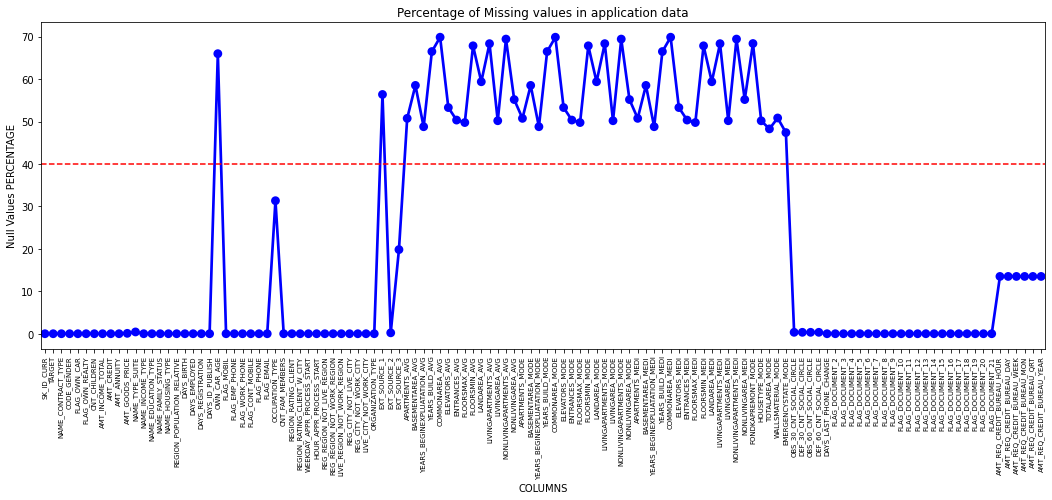

In [11]:
# plot columns vs % missing value - with 40% being the cut-off marks - in application_data
null_appl = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
null_appl.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_appl,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [12]:
# more than or equal to 40% empty rows columns in application_data
null_40_appl = null_appl[null_appl["Null Values Percentage"]>=40]
null_40_appl

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [13]:
# Number of columns with more than or equal to 40% in application_data
len(null_40_appl)

49

<a id="null2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.B. Missing Values in prev_application
            </span>   
        </font>    
</h3>

In [14]:
# % missing values for each column in prev_application
round(prev_application.isnull().sum() / prev_application.shape[0] * 100.00,2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

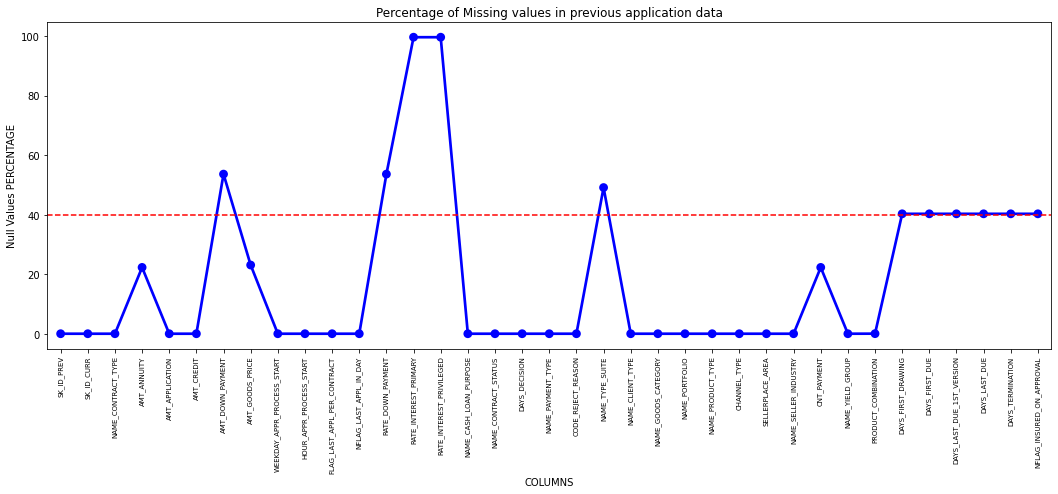

In [15]:
# plot columns vs % missing value - with 40% being the cut-off marks - in prev_application
null_prev_appl = pd.DataFrame((prev_application.isnull().sum())*100/prev_application.shape[0]).reset_index()
null_prev_appl.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_prev_appl,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previous application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [16]:
# more than or equal to 40% empty rows columns in prev_application
null_40_prev_appl = null_prev_appl[null_prev_appl["Null Values Percentage"]>=40]
null_40_prev_appl

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [17]:
# Number of columns with more than or equal to 40% in prev_application
len(null_40_prev_appl)

11

<a id="clean1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.C. Analyze and Remove Unnecessary Columns in application_data
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Arial'>
            4.C.1. EXT_SOURCE_X
            </span>   
        </font>    
</h4>

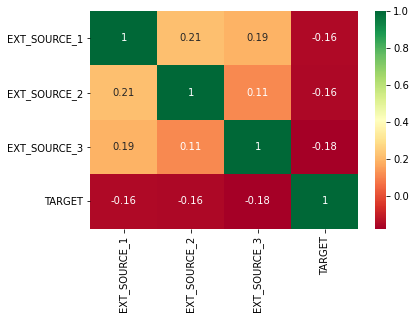

In [18]:
# check correlation between EXT_SOURCE_X columns and TARGET column
ext_source = application_data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
ext_source_corr = ext_source.corr()
ax = sns.heatmap(ext_source_corr,
            xticklabels=ext_source_corr.columns,
            yticklabels=ext_source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

**Based on the heatmap, we can see that there is almost no correlation between EXT_SOURCE_X columns and target column, so we will drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values**

In [19]:
# create a list of columns that needs to be dropped
# EXT_SOURCE_1 column is already included in null_40_appl
remove_col_appl = null_40_appl["Column Name"].tolist()+ ['EXT_SOURCE_3'] 
len(remove_col_appl)

50

<h4>   
      <font color = darkgreen >
            <span style='font-family:Arial'>
            4.C.2. FLAG_DOCUMENT_X
            </span>   
        </font>    
</h4>

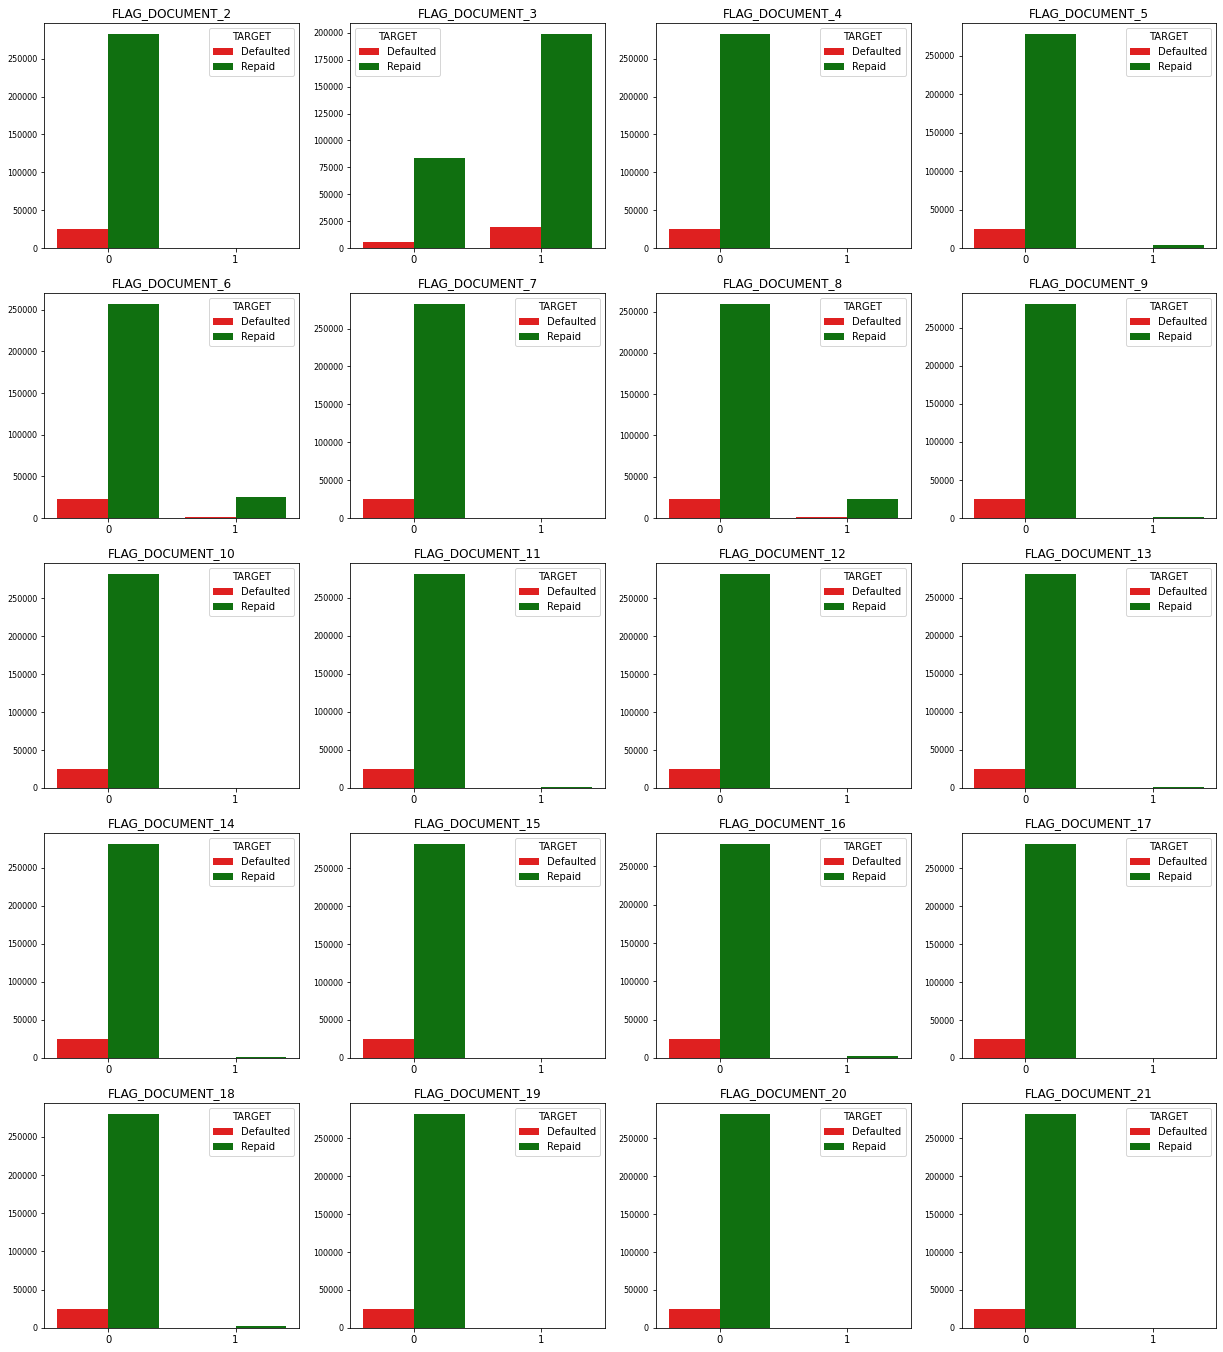

In [20]:
# check if FLAG_DOCUMENT_X has any correlation with loan repayment status
flag_docs = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
             'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
             'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 
             'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
flag_df = application_data[flag_docs+["TARGET"]]

num_flag_docs = len(flag_docs)

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulted",0:"Repaid"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(flag_docs,range(num_flag_docs)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(flag_df[i],hue=flag_df["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**The above graph shows that almost all people who applied for loans did not submit FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. It also shows that there is a less chance of defaulting the loan if a borrower submitted FLAG_DOCUMENT_3. Thus, except for FLAG_DOCUMENT_3, we can remove the rest of FLAG_DOCUMENT_X.**

In [21]:
# include the flag documents in remove_col_appl
flag_docs.remove('FLAG_DOCUMENT_3') 
remove_col_appl = remove_col_appl + flag_docs
len(remove_col_appl)

69

<h4>   
      <font color = darkgreen >
            <span style='font-family:Arial'>
            4.C.3. Contact parameters
            </span>   
        </font>    
</h4>

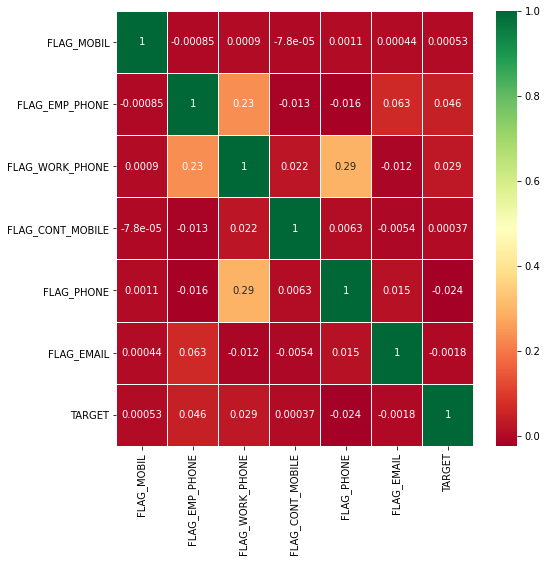

In [22]:
# check if there is any correlation between mobile phone, work phone, email, and other contacts parameters
contact_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr = application_data[contact_cols].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

**There is no correlation between flags of mobile phone, email etc with loan repayment; thus, these columns can be removed.**

In [23]:
# include the above 6 flag columns to be removed
contact_cols.remove('TARGET') 
remove_col_appl = remove_col_appl + contact_cols
len(remove_col_appl)

75

In [24]:
# Now drop the unwanted columns from application_data
application_data.drop(labels=remove_col_appl,axis=1,inplace=True)

In [25]:
# inspect the dataframe after removal of unwanted columns
application_data.shape

(307511, 47)

In [26]:
# inspect the column types after removal of unwanted columns
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<a id="clean2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.C. Analyze and Remove Unnecessary Columns in prev_application
            </span>   
        </font>    
</h3>

In [27]:
# get the 11 columns which has more than 40% unknown in prev_application
remove_col_prev = null_40_prev_appl["Column Name"].tolist()
remove_col_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [28]:
# add other columns which are not needed
remove_col_prev = remove_col_prev + ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
len(remove_col_prev)

13

In [29]:
# drop unwanted columns from prev_application
prev_application.drop(labels=remove_col_prev,axis=1,inplace=True)
# inspect the dataframe after removal of unwanted columns
prev_application.shape

(1670214, 24)

In [30]:
# inspect column types after removal of unwanted columns
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

<a id="cat1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.E. Convert numerical values to categorical values in application_data
            </span>   
        </font>    
</h3>

<span style='font-family:Arial'>
    <b>Convert numerical values to categorical values in application_data: </b> 
        <ul>
            <li>Convert DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH from negative to positive as days cannot be negative.</li>
            <li>Calculate AGE and create categorical bins</li>
            <li>Calculate YEARS_EMPLOYED and create categorical bins</li>
            <li>Create categorical bins for amount variables</li>
            <li>Convert object and numerical data types to category data type</li>
        </ul>       
</span>    


In [31]:
# convert negative days to positive days

days_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in days_cols:
    application_data[col] = abs(application_data[col])

In [32]:
# create bins for AGE
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

application_data['AGE_GROUP']=pd.cut(application_data['AGE'],bins=bins,labels=slots)

# check the binning of data and % of data in each category
application_data['AGE_GROUP'].value_counts(normalize=True)*100

50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

**31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.**

In [33]:
# create bins for YEARS EMPLOYED
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

application_data['EMPLOYMENT_YEAR']=pd.cut(application_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

# check the binning of data and % of data in each category
application_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

**More than 55% of the loan applicants have 0-5 years work experience and almost 80% of them have less than 10 years work experience**

In [34]:
# bin numerical columns to create categorical columns

# create bins for income
application_data['AMT_INCOME_TOTAL']=application_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins,labels=slot)

# check the binning of data and % of data in each category
application_data['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

**More than 50% loan applicants have income 100K-200K. Almost 92% loan applicants have income less than 300K**

In [35]:
# create bins for credit amount
application_data['AMT_CREDIT']=application_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

# check the binning of data and % of data in each category
application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

**More Than 16% loan applicants have taken loan above 1M.**

In [36]:
# inspect column types 
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [37]:
# convert object and numerical data types to category data type
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE',
                       'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                       'WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY',
                       'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT',
                       'WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY']

for col in categorical_columns:
    application_data[col] =pd.Categorical(application_data[col])

# inspect column types after conversion
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

<a id="cat2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
            4.F. Convert numerical values to categorical values in prev_application
            </span>   
        </font>    
</h3>

<span style='font-family:Arial'>
    <b>Strategy for prev_application: </b> 
        <ul>
            <li>Convert DAYS_DECISION from negative to positive values and create categorical bins.</li>
            <li>Convert object data type to category data type.</li>
        </ul>
</span>    

In [38]:
# convert negative days to positive days 
prev_application['DAYS_DECISION'] = abs(prev_application['DAYS_DECISION'])

#age group calculation e.g. 388 will be grouped as 300-400
prev_application['DAYS_DECISION_GROUP'] = (
    prev_application['DAYS_DECISION']-(prev_application['DAYS_DECISION'] % 400)).astype(str)+'-'+ (
    prev_application['DAYS_DECISION']-(prev_application['DAYS_DECISION'] % 400) + 400).astype(str)

prev_application['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

**About 37% loan applicants have applied for a new loan within 0-400 days of previous loan decision**

In [39]:
# convert object and numerical data types to category data type
cat_col_prev = ['NAME_CASH_LOAN_PURPOSE','FLAG_LAST_APPL_PER_CONTRACT','NAME_CONTRACT_STATUS',
                'NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                'NAME_YIELD_GROUP','PRODUCT_COMBINATION','NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in cat_col_prev:
    prev_application[col] =pd.Categorical(prev_application[col])
    
# inspect column types after conversion
prev_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 25 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 10  NAME_CONTRACT_STATUS         1670214 non-null  category
 11  DAYS_DECISION                1670214 non-null  int64   
 12  NAME_PAYMENT_TYPE           

<a id="impute1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             4.G. Impute missing values in application_data
            </span>   
        </font>    
</h3>

<span style='font-family:Arial'>
    <b>Impute missing values in application_data: </b> 
        <ul>
            <li>For categorical variables with low null percentage, impute with the most frequent items.</li>
            <li>For categorical variables with high null percentage, create new category as not to influence the analysis.</li>
            <li>AMT_REQ_CREDIT_BUREAU_X, numerical variables which represent number of enquiries made, have low null percentages and no outliers. We will impute with median -- mean() returns decimal values while these columns represent number of enquiries made, which cannot be decimal.</li>     
        </ul>
    </span>    

In [40]:
# check % null value of each column in application_data
round(application_data.isnull().sum() / application_data.shape[0] * 100.00,2).sort_values(ascending=False)

OCCUPATION_TYPE                31.35
EMPLOYMENT_YEAR                27.08
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
NAME_TYPE_SUITE                 0.42
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_INCOME_RANGE                0.08
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
REG_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_LIVE_CITY          0.00
SK_ID_CURR                      0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_3                 0.00
REG_REGION_NOT_WORK_REGION      0.00
AGE                             0.00
AGE_GROUP                       0.00
YEARS_EMPLOYED                  0.00
L

<span style='font-family:Arial'>
    <b>OCCUPATION_TYPE</b>
    <br>Impute categorical variable 'OCCUPATION_TYPE', which has high null percentage(31.35%), with a new category as assigning it to any existing category might influence the analysis.
    </span>

In [41]:
application_data['OCCUPATION_TYPE'] = application_data['OCCUPATION_TYPE'].cat.add_categories('Unknown')
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 
application_data['OCCUPATION_TYPE']

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507        Unknown
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: category
Categories (19, object): ['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff', ..., 'Secretaries', 'Security staff', 'Waiters/barmen staff', 'Unknown']

<span style='font-family:Arial'>
    <b>EMPLOYMENT_YEAR</b>
    <br>Impute categorical variable 'EMPLOYMENT_YEAR', which has high null percentage(27.08%), with a new category as assigning it to any existing category might influence the analysis.
    </span>

In [42]:
application_data['EMPLOYMENT_YEAR'] = application_data['EMPLOYMENT_YEAR'].cat.add_categories('Unknown')
application_data['EMPLOYMENT_YEAR'].fillna('Unknown', inplace =True) 
application_data['EMPLOYMENT_YEAR']

0             0-5
1             0-5
2         Unknown
3            5-10
4            5-10
           ...   
307506    Unknown
307507    Unknown
307508      20-30
307509      10-20
307510        0-5
Name: EMPLOYMENT_YEAR, Length: 307511, dtype: category
Categories (9, object): ['0-5' < '5-10' < '10-20' < '20-30' ... '40-50' < '50-60' < '60 above' < 'Unknown']

**AMT_REQ_CREDIT_BUREAU_X**

In [43]:
application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<span style='font-family:Arial'>
    Impute numerical variables with the median as there are no outliers that can be seen from results of describe(), and mean() returns decimal values while these columns represent number of enquiries made, which cannot be decimal.
    </span>

In [44]:
num_enquiries = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in num_enquiries:
    application_data[col].fillna(application_data[col].median(),inplace = True)

**NAME_TYPE_SUITE**

In [45]:
application_data['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

<span style='font-family:Arial'>
    NAME_TYPE_SUITE has low null percentage(0.42%) - impute with the most frequent value
    </span>

In [46]:
application_data['NAME_TYPE_SUITE'].fillna((application_data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

<span style='font-family:Arial'>
    We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We will ignore as the percentages are very small.
    </span>



<a id="impute2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             4.H. Impute missing values in prev_application
            </span>   
        </font>    
</h3>

<span style='font-family:Arial'>
    <b>Impute missing values in prev_application: </b> 
    <ul>
        <li>Impute CNT_PAYMENT after analyzing NAME_CONTRACT_STATUS.</li>
        <li>Impute null values after plotting and analyzing distribution pattern.</li>    
    </ul>
</span>    

In [47]:
# check % null value of each column in application_data
round(prev_application.isnull().sum() / prev_application.shape[0] * 100.00,2).sort_values(ascending=False)

AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
AMT_CREDIT                      0.00
AMT_APPLICATION                 0.00
NAME_CONTRACT_TYPE              0.00
DAYS_DECISION_GROUP             0.00
dtype: float64

**AMT_GOODS_PRICE**

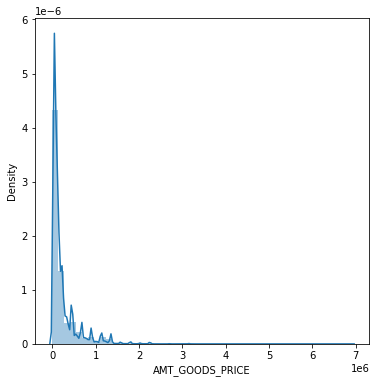

In [48]:
plt.figure(figsize=(6,6))
sns.distplot(prev_application['AMT_GOODS_PRICE'])
plt.show()

<span style='font-family:Arial'>
    There is a peak at the left side of the distribution; it also indicates the presence of outliers. Imputing with mean would not be the right approach; we will impute with median.
</span>

In [49]:
prev_application['AMT_GOODS_PRICE'].fillna(prev_application['AMT_GOODS_PRICE'].median(), inplace=True)

**AMT_ANNUITY**

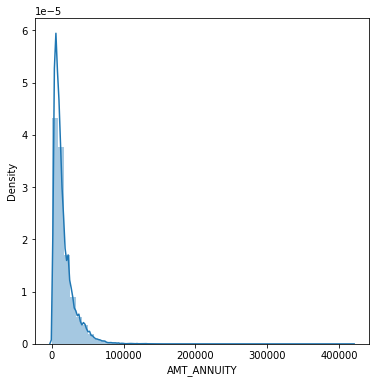

In [50]:
plt.figure(figsize=(6,6))
sns.distplot(prev_application['AMT_ANNUITY'])
plt.show()

<span style='font-family:Arial'>
    There is a peak at the left side of the distribution; it also indicates the presence of outliers. Imputing with mean would not be the right approach; we will impute with median.
</span>

In [51]:
prev_application['AMT_ANNUITY'].fillna(prev_application['AMT_ANNUITY'].median(),inplace = True)

**CNT_PAYMENT**

In [52]:
prev_application.loc[prev_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

<p>
    <span style='font-family:Arial'>
           Impute CNT_PAYMENT with 0 since the NAME_CONTRACT_STATUS for these rows indicate that most of these loans were not started.
    </span>
</p>

In [53]:
prev_application['CNT_PAYMENT'].fillna(0,inplace = True)

<span style='font-family:Arial'>
    <br>We still have a few null values in the PRODUCT_COMBINATION column. We will ignore this since the missing percentage is very small.
</span>  

<a id="outlier1"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             4.I. Identifying the outliers in application_data
            </span>   
        </font>    
</h3>

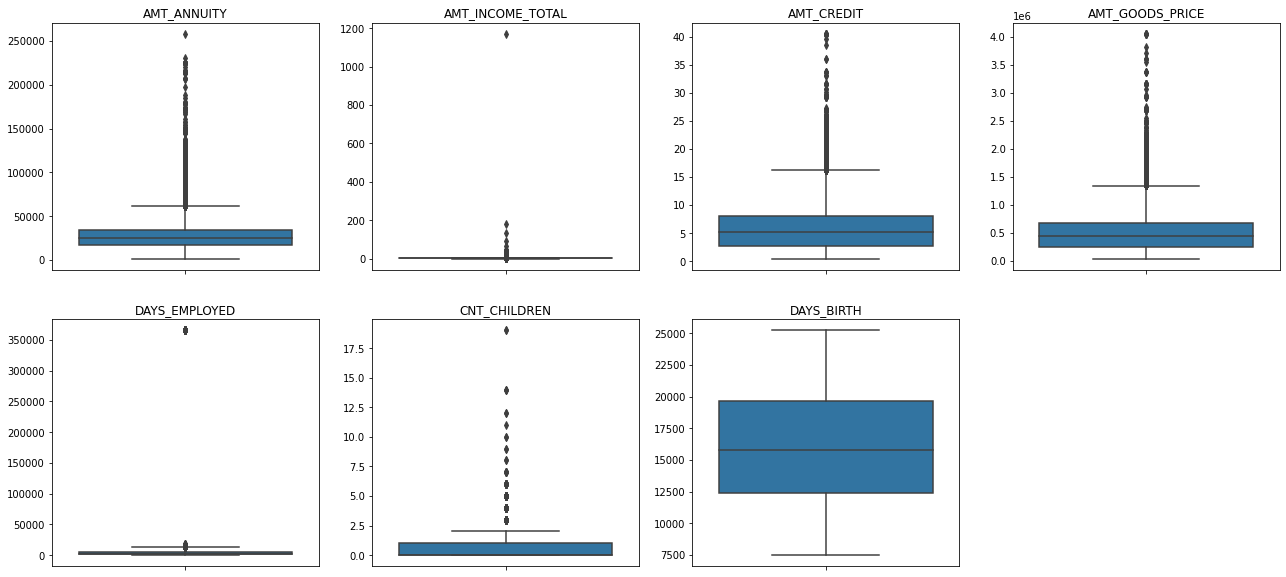

In [54]:
plt.figure(figsize=(22,10))

outlier = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED',
                     'CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<p>
    <span style='font-family:Arial'>
        <br>From graph above, we can see that in application_data:
        <ol>
            <li>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.</li>
            <li>AMT_INCOME_TOTAL has outlier values that indicate that a few of the loan applicants have high income compared to the others.</li>
            <li>DAYS_BIRTH has no outlier, which means that the data available is reliable.</li>
            <li>DAYS_EMPLOYED has outlier values around 350000(days), which translates to ~958 years which is impossible and hence this has to be incorrect entries.</li>
        </ol>          
    </span> 
</p>

In [55]:
application_data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
                  'CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


<a id="outlier2"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             4.J. Identifying the outliers in prev_application
            </span>   
        </font>    
</h3>

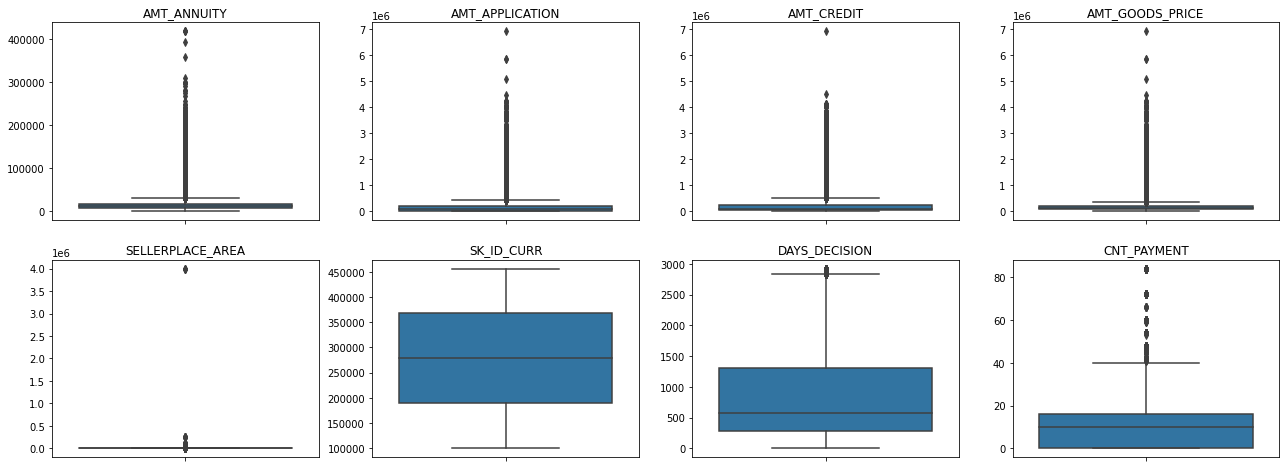

In [56]:
plt.figure(figsize=(22,8))

prev_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA',
                     'SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']

for i in enumerate(prev_outlier):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<p>
    <span style='font-family:Arial'>
        <br>From graph above, we can see that in prev_application:
        <ol>
            <li>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have a huge number of outliers.</li>
            <li>CNT_PAYMENT has a few outliers.</li>
            <li>SK_ID_CURR is an ID column and hence, no outlier.</li>
            <li>DAYS_DECISION has a very small number of outliers, indicating that these previous applications decisions were taken a long time ago.</li>
        </ol>        
    </span>    
</p>

In [57]:
prev_application[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA',
                  'CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,2.011815e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.808629e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,6.750000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


<a id="analysis"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            5. Data Analysis
            </span>   
        </font>    
</h2>

<span style='font-family:Arial'>
    <p>Data analysis flow:</p>
    <ul>
        <li>Imbalance in Data</li>
        <li>Categorical Data Analysis</li>
        <ul>
            <li>Categorical segmented Univariate Analysis</li>
            <li>Categorical Bi/Multivariate analysis</li>
        </ul>
        <li>Numeric Data Analysis</li>
        <ul>
            <li>Bi-furcation of databased based on TARGET data</li>
            <li>Correlation Matrix</li>
            <li>Numerical segmented Univariate Analysis</li>
            <li>Numerical Bi/Multivariate analysis</li>
        </ul> 
    </ul>
</span> 

<a id="imbalance"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             5.A. Imbalance Analysis
            </span>   
        </font>    
</h3>

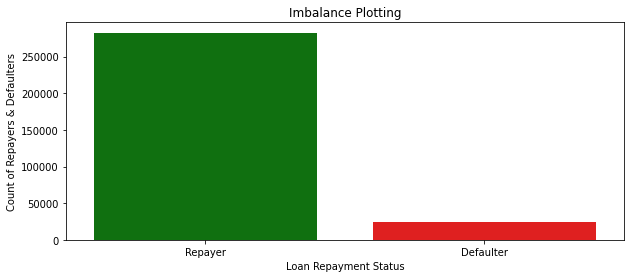

In [58]:
Imbalance = application_data["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [59]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
percent_0 = round(count_0/(count_0+count_1)*100,2)
percent_1 = round(count_1/(count_0+count_1)*100,2)

print('Percent Repayer and Defaulter are: %.2f and %.2f'%(percent_0,percent_1))
print('Ratio of Repayer to Defaulter is %.2f : 1 (approx)'%(count_0/count_1))

Percent Repayer and Defaulter are: 91.93 and 8.07
Ratio of Repayer to Defaulter is 11.39 : 1 (approx)


<a id="pltfunc"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             5.B. Plotting Functions
            </span>   
        </font>    
</h3>

In [60]:
# function for plotting countplots in univariate categorical analysis on application_data
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = application_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_percent = application_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_percent["TARGET"] = cat_percent["TARGET"]*100
    cat_percent.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=application_data,
                    hue ="TARGET",
                    order=cat_percent[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_percent[feature], 
                    data=cat_percent,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show()

In [61]:
# function for plotting countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [62]:
# function for plotting relplot for bivariate numerical analysis on application_data

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=application_data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [63]:
#function for plotting countplot in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)  

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [64]:
# Function to plot pointplot on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

<a id="catvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             5.C. Categorical Variables Analysis
            </span>   
        </font>    
</h3>

<h4>   
      <font color = darkgreen >
            <span style='font-family:Arial'>
             5.C.1. Univariate Analysis
            </span>   
        </font>    
</h4>

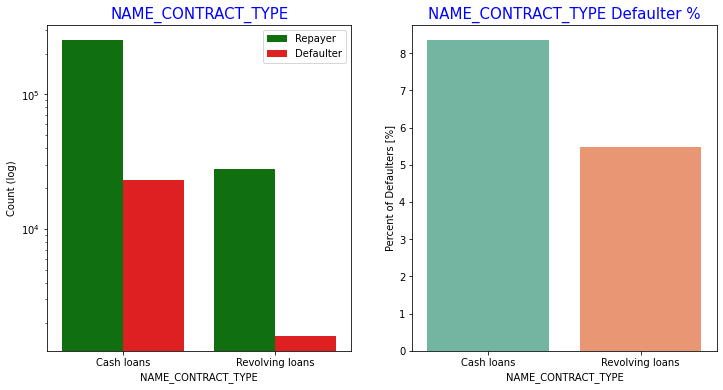

In [65]:
# check the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

<span style='font-family:Arial'>
    <li>Revolving loans are just a fraction of Cash loans. </li>
    <li>Revolving loans are just a small fraction (10%) of Cash loans; however, a larger amount of Revolving loans has defaulted.</li>
</span>    

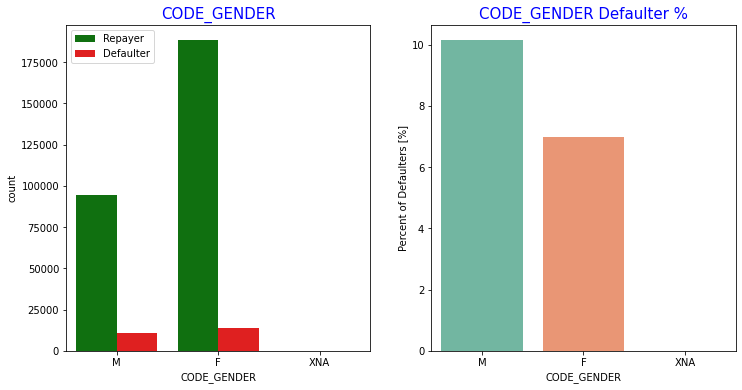

In [66]:
# check the type of Gender vs. loan repayment status
univariate_categorical('CODE_GENDER')

<span style='font-family:Arial'>
The number of female clients is almost double the number of male clients; however, males have higher chance of defaulting. 
</span>    

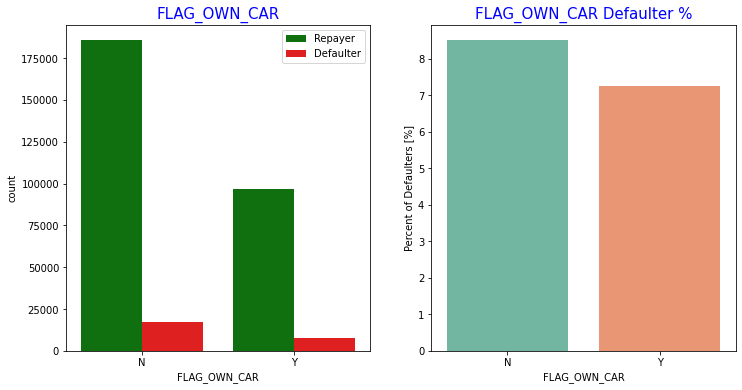

In [67]:
# check if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

<span style='font-family:Arial'>
Clients who do not own a car are twice the number of clients who own a car. The default percentage for both cases is almost the same. There is no correlation between owning a car and loan repayment.   
</span>    

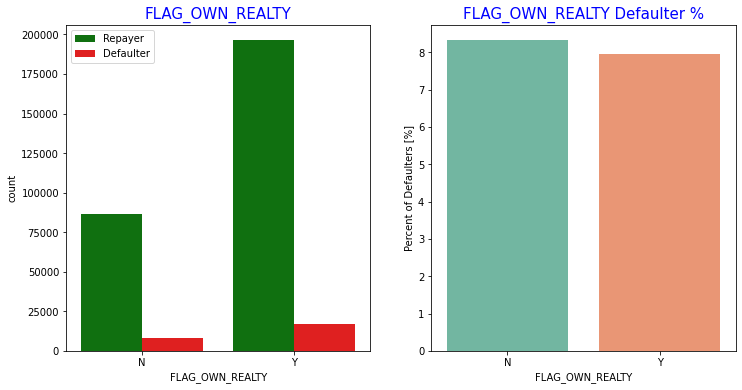

In [68]:
# check if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

<span style='font-family:Arial'>
Clients who own a realty are more than double the number of clients who do not own a realty. The default percentage for both cases is almost the same. There is no correlation between owning a realty and loan repayment.   
</span>  

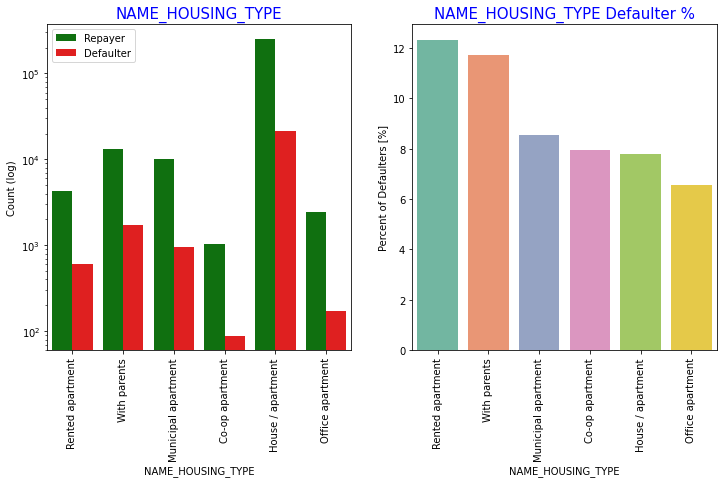

In [69]:
# analyze Housing Type vs. loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

<span style='font-family:Arial'>
    <ol>
        <li>Majority of the clients live in House/apartment</li>
        <li>Clients living in office apartments have lowest default rate</li>
        <li>Clients living in rented apartments and people living with parents have higher default rate</li>
    </ol>
</span> 

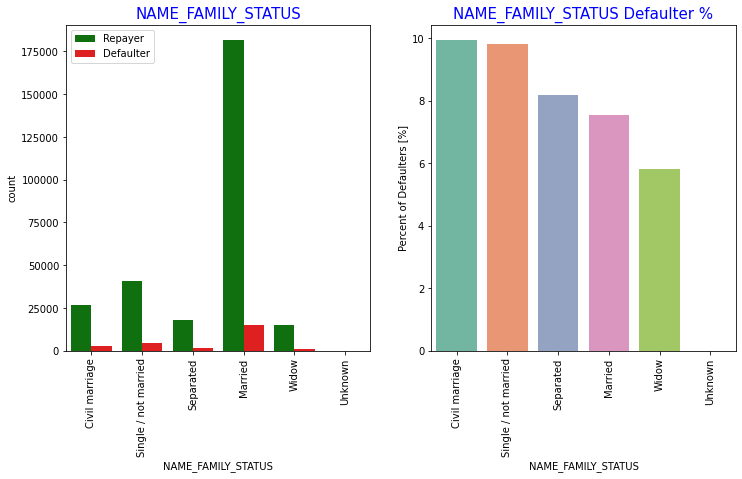

In [70]:
# analyze Family Status vs. loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<span style='font-family:Arial'>
<ol>
    <li>Most of the clients are married, followed by Single/not married and civil marriage </li>
    <li>In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown). </li>
</ol>
</span>    

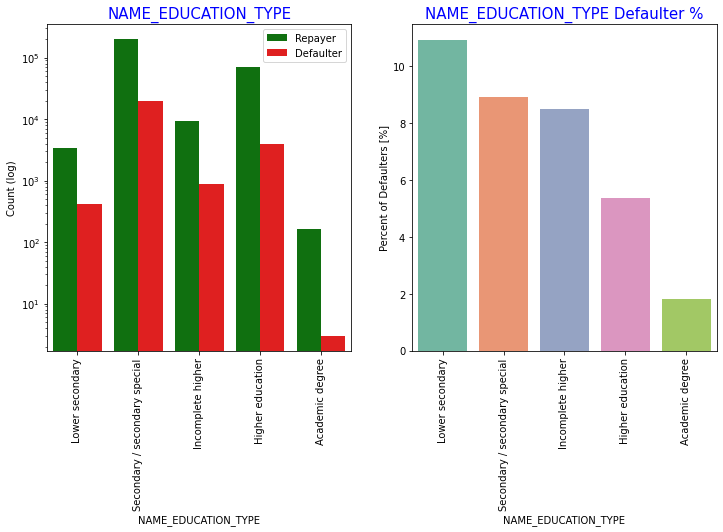

In [71]:
# analyze Education Type vs. loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

<span style='font-family:Arial'>
<ol>
    <li>Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree</li>
    <li>The Lower secondary category, although quite rare, has the largest rate of defaulting the loan (~11%). Clients with Academic degree have less than 2% defaulting rate. </li>
</ol>
</span> 

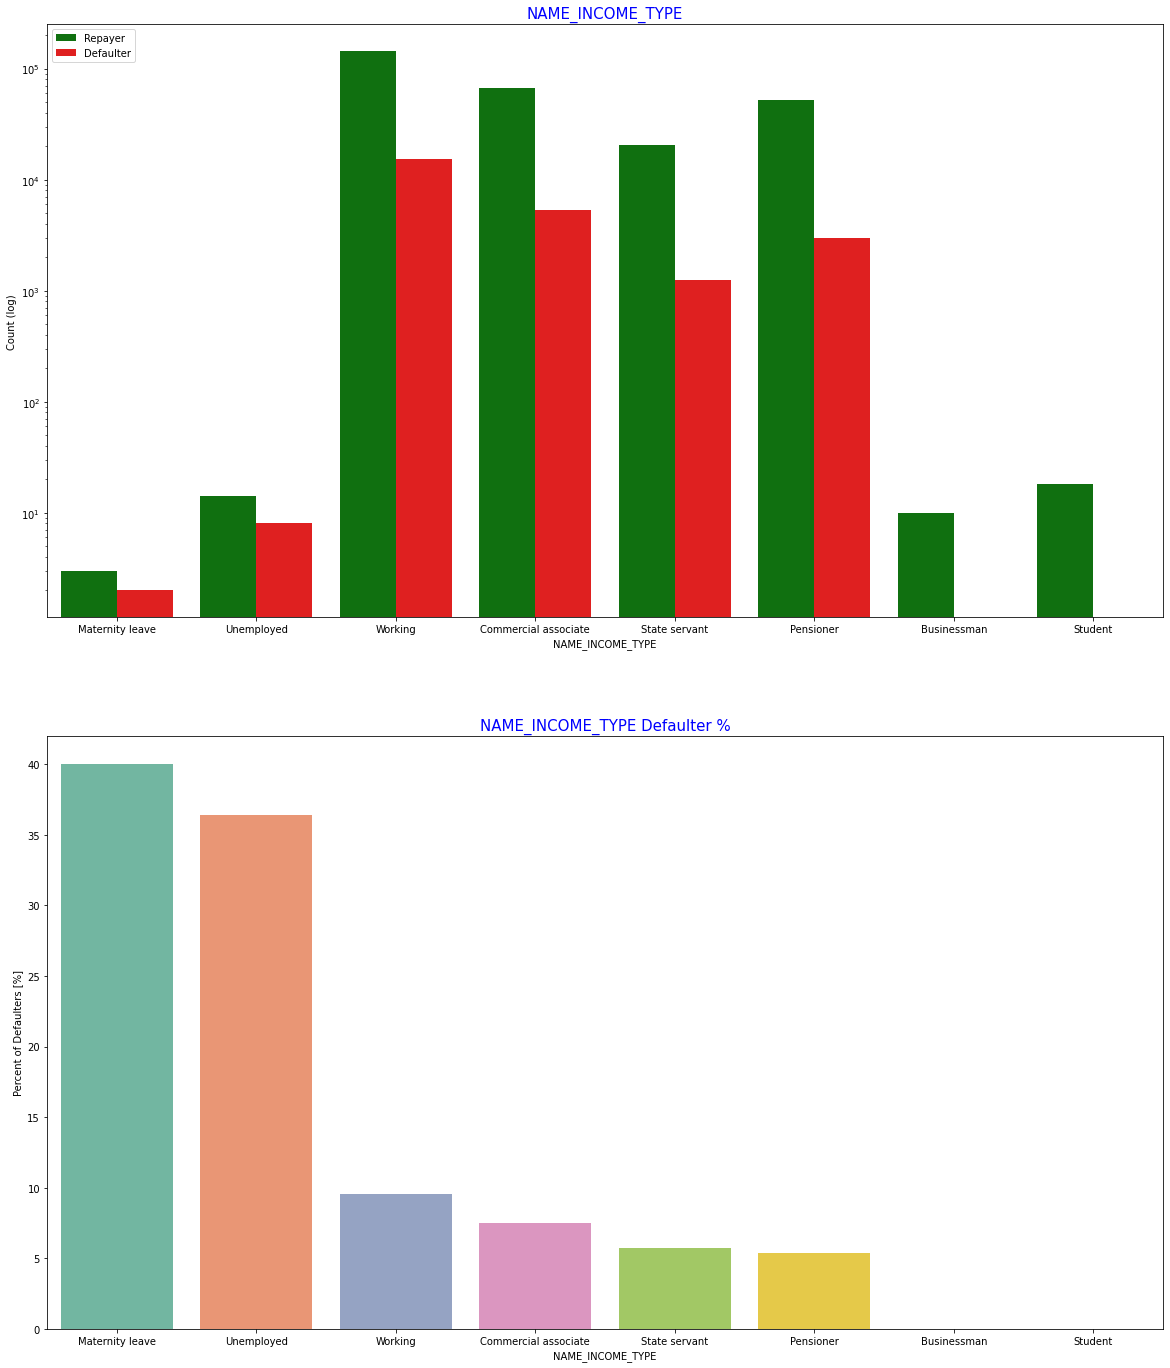

In [72]:
# analyze Income Type vs. loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,False,False)

<span style='font-family:Arial'>
    <ul>
        <li>Most of the clients have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
        <li>Clients with type of income Maternity leave have almost 40% defaulting rate, followed by Unemployed (~37%). The remaining types of incomes are under 10% defaulting rate.</li>
        <li>Student and Businessmen, which have less in numbers, do not have any default record. Thus, these two categories are the <b>safest</b> for providing loan.</li>  
    </ul>
</span>  

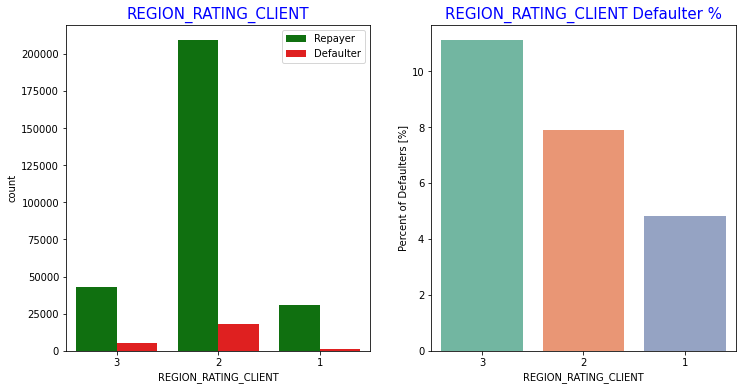

In [73]:
# analyze Region Rating where clients live vs. loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<span style='font-family:Arial'>
    <ol>
        <li>Most of the clients are living in Region_Rating 2 place.</li>
        <li>Region Rating 3 has the highest default rate (~11%)</li>
        <li>Region_Rating 1, where the least number of clients live, has the lowest probability of defaulting, thus <b>safer</b> for approving loans </li>
    </ol>
</span>  

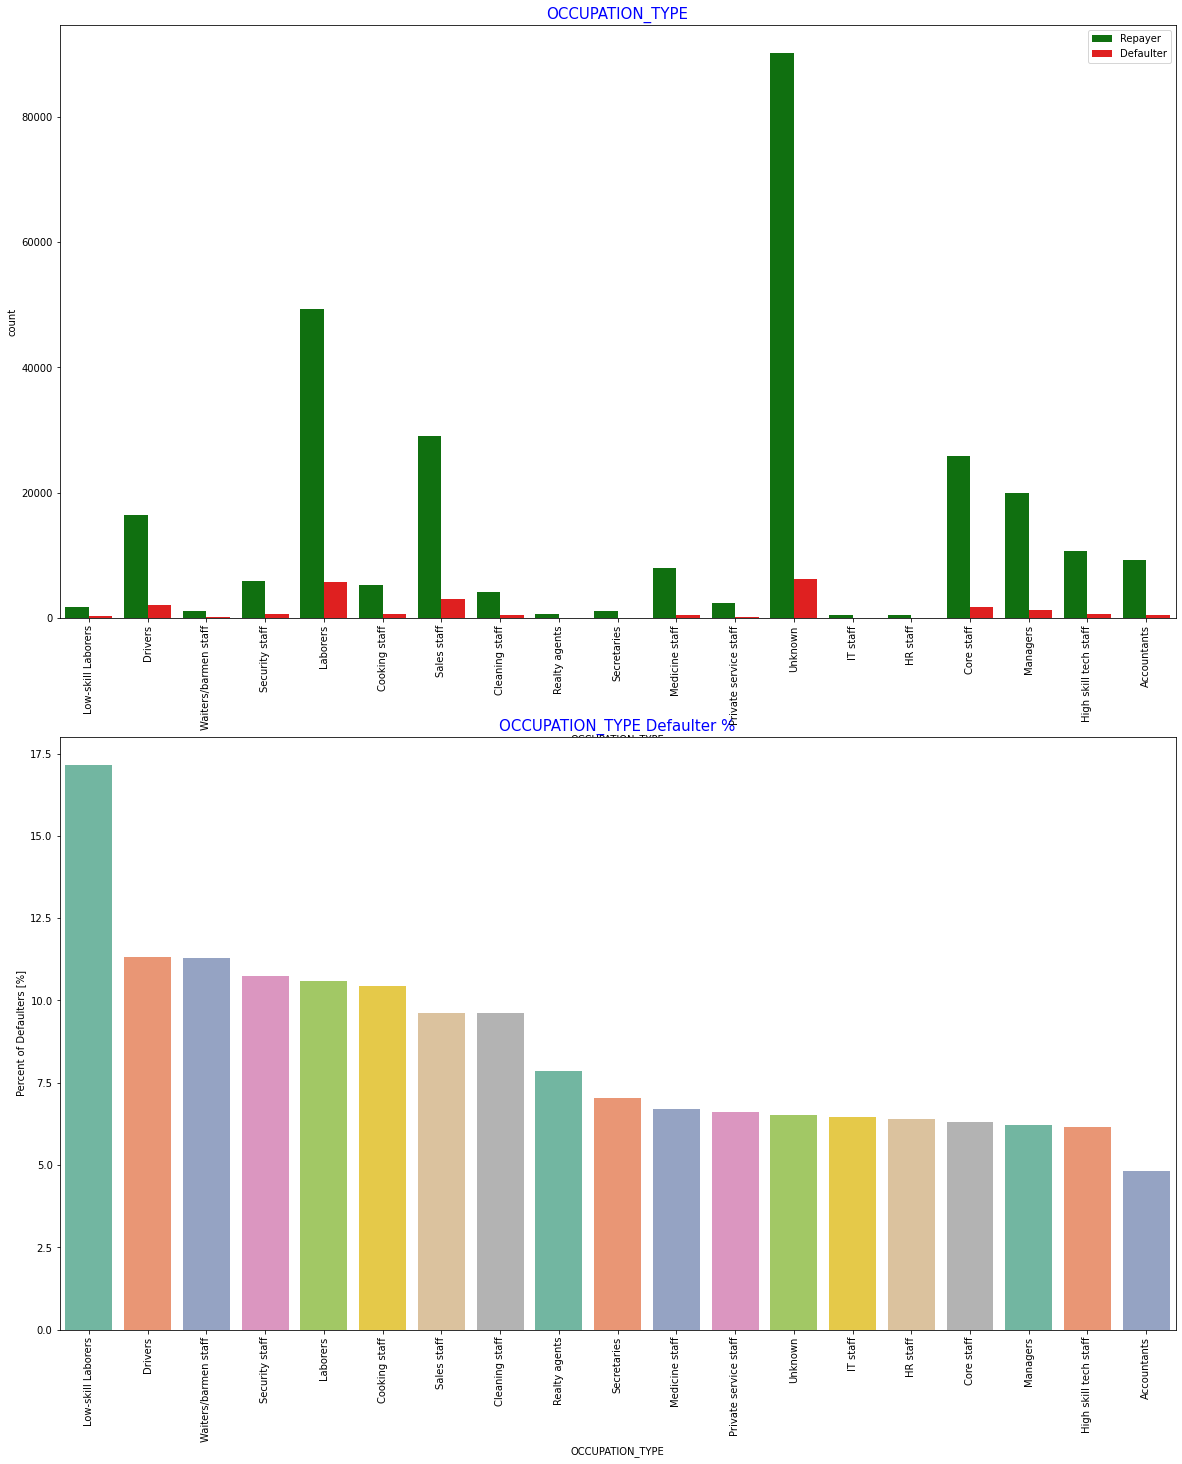

In [74]:
# analyze Occupation Type vs loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

<span style='font-family:Arial'>
    <ol>
        <li>Most of the loans were taken by Laborers, followed by Sales staff. IT staff took the lowest amount of loans.</li>
        <li>The category with the highest percent of defaults are Low-skill Laborers (~17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff. </li>
    </ol>
</span> 

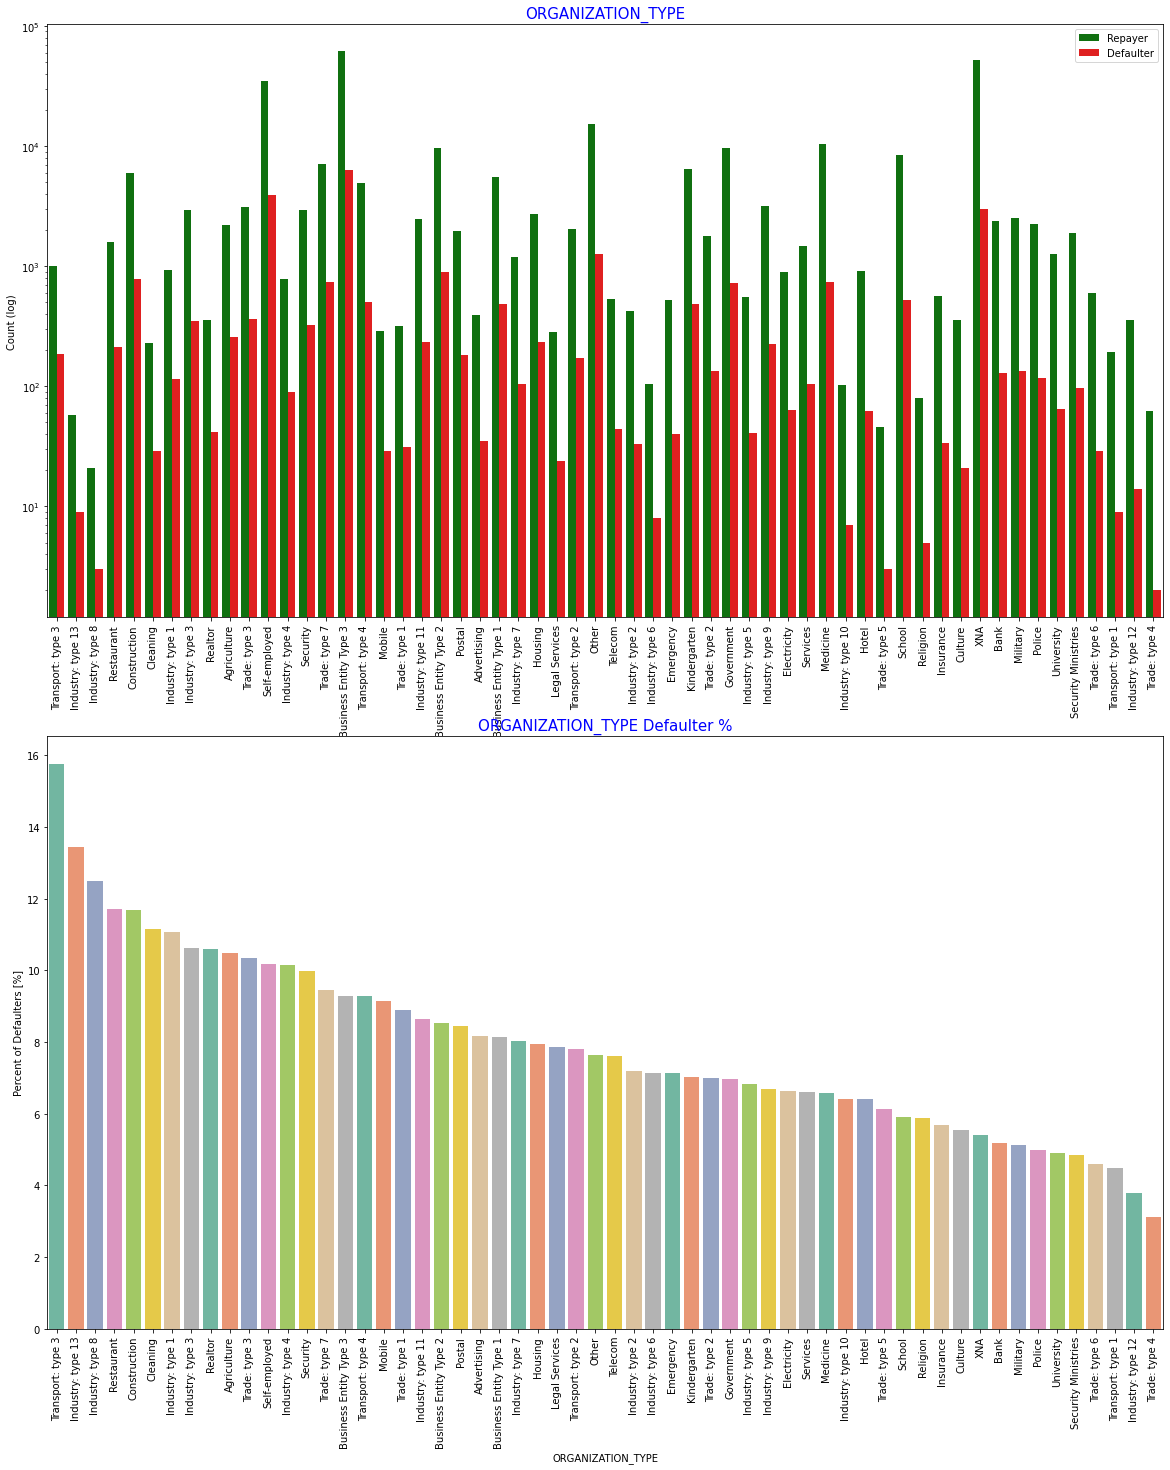

In [75]:
# check Organization type vs. Loan repayment status
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<span style='font-family:Arial'>
    <ol>
        <li>Organizations with highest default rate are Transport: type 3 (~16%), Industry: type 13 (~13.5%), Industry: type 8 (~12.5%) and Restaurant (less than 12%).</li>
         <li>Most of the clients are from Business Entity Type 3 </li>
         <li>Organization type information is unavailable(XNA) for a very high number of applications.</li>
    </ol>
        From the graphs, we can see that the following categories of organization type have lesser default rate, thus, safer for providing loans:
    <ul>
        <li>Trade Type 4</li>
        <li>Industry type 12</li>
    </ul>
</span>    

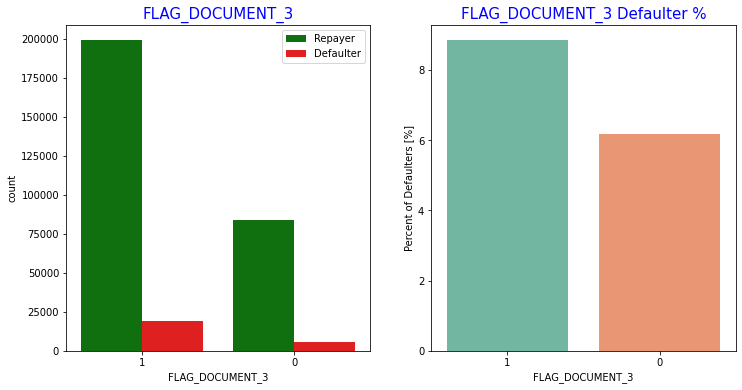

In [76]:
# analyze Flag_Doc_3 submission status vs. Loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

<span style='font-family:Arial'>
    <br>There is no significant correlation between repayers and defaulters in terms of submitting document 3. As we can see from the graphs, even if applicants have submitted the document, they defaulted a slightly more (~9%) than who have not submitted the document (~6%)
</span>  

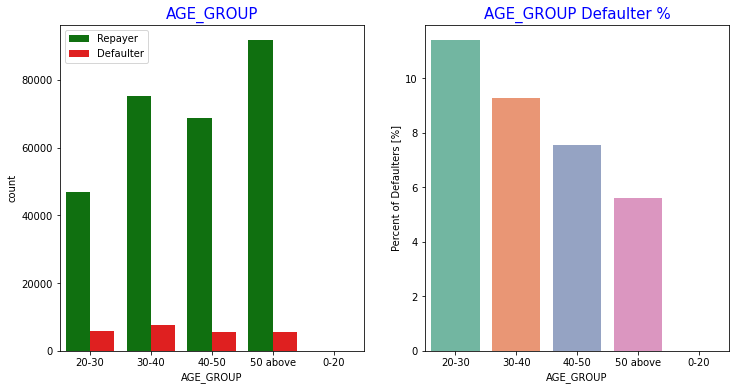

In [77]:
# analyze Age Group vs. loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

<span style='font-family:Arial'>
    <ol>
        <li>Clients age 20-40 have higher probability of defaulting</li>
        <li>Clients above age of 50 have low probability of defaulting </li>
    </ol>
</span>  

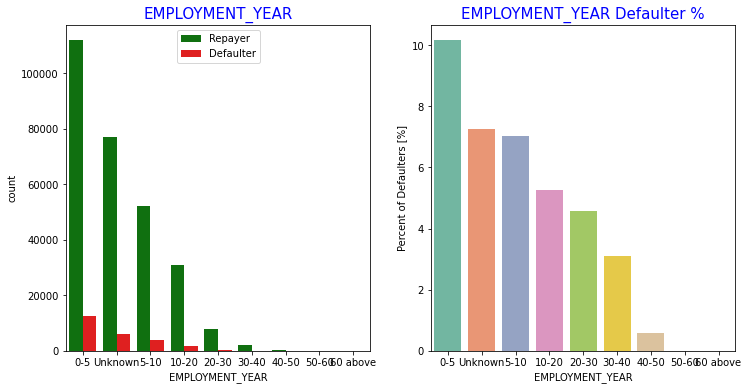

In [78]:
# analyze Employment_Year vs. Loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

<span style='font-family:Arial'>
    <ol>
        <li>Majority of the clients have been employeed 0-5 years. The defaulting rates of this group is also the highest (~10%)</li>
        <li>With the increasing of employment year, the defaulting rate is also gradually decreasing - with people having 40+ year employment year having less than 1% default rate </li>
    </ol>
</span> 

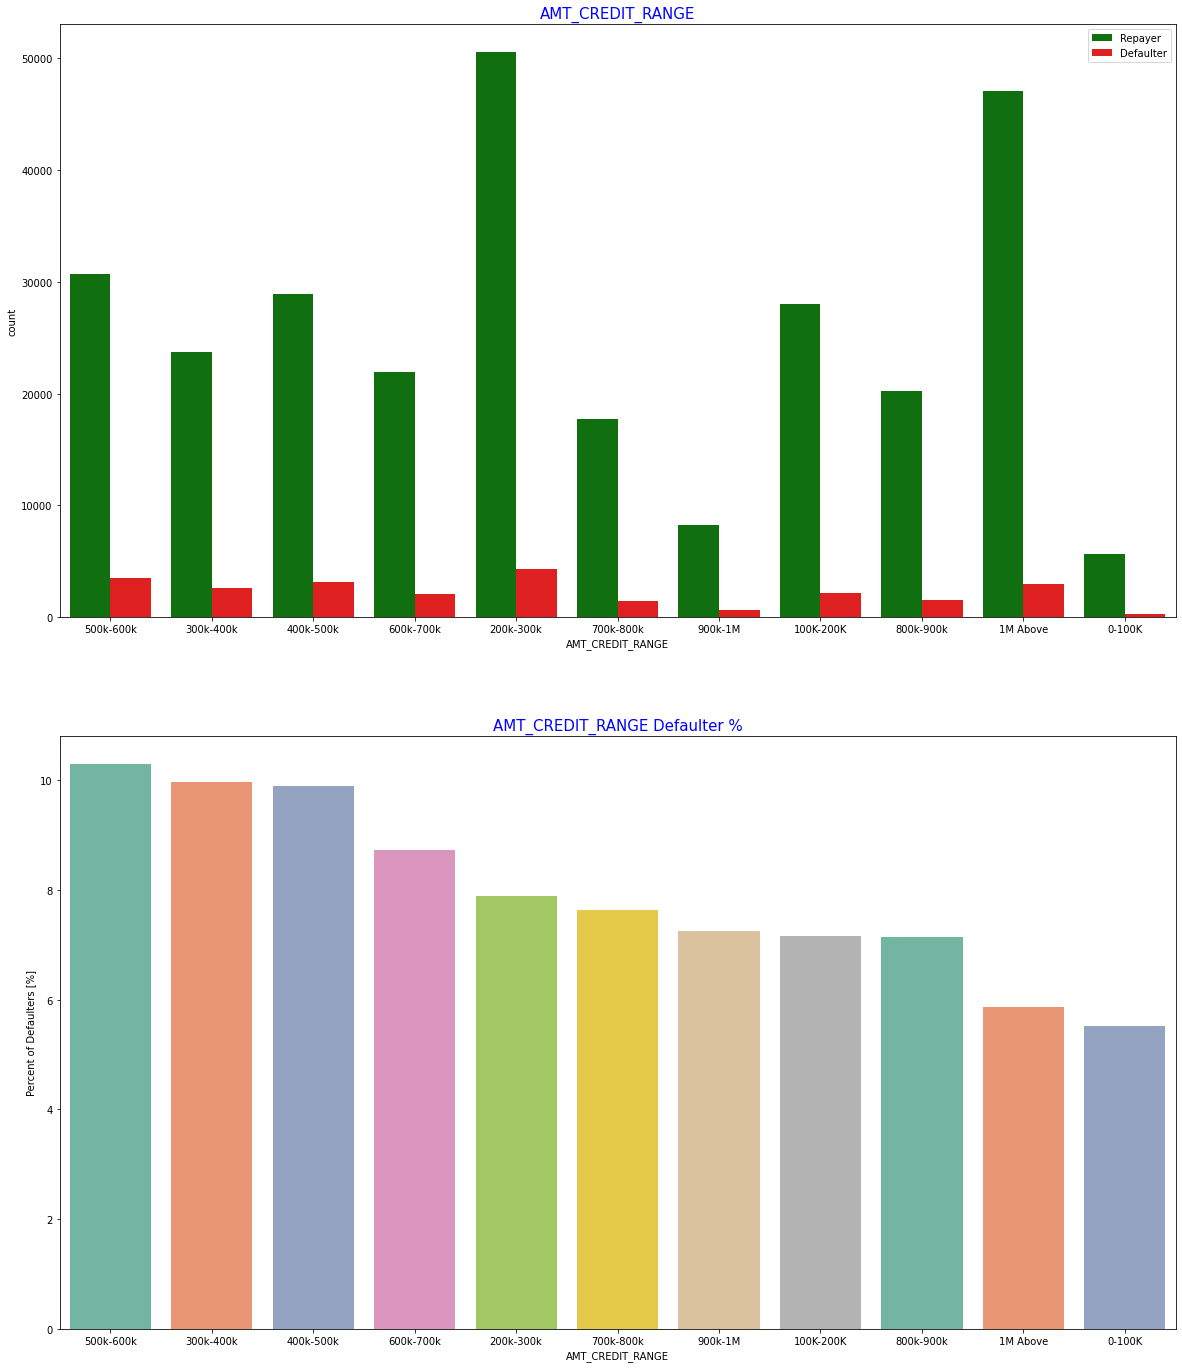

In [79]:
# analyze Amount_Credit vs. loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

<span style='font-family:Arial'>
    <ol>
        <li>Most of the loans are 200-300k and 1M above.</li>
        <li>The least number of loans are 0-100k.</li>
        <li>Clients with loans for 300-600k tend to default more than others. </li>
    </ol>
</span>

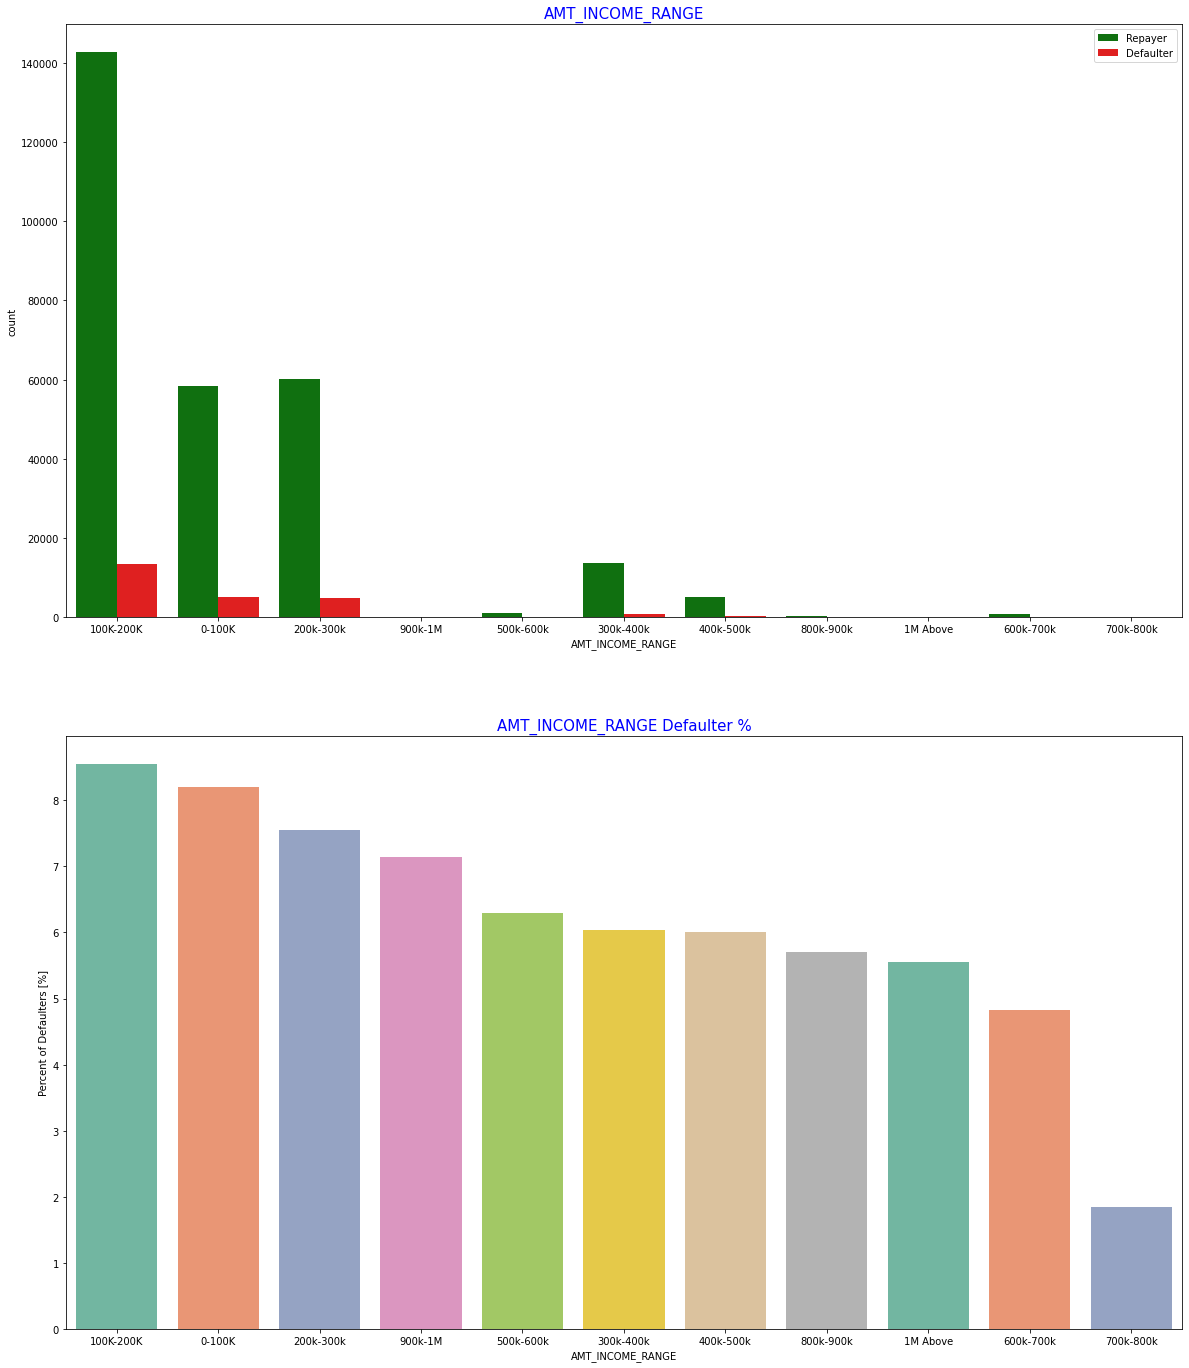

In [80]:
# analyze Income range vs. Loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

<span style='font-family:Arial'>
    <ol>
        <li>~90% of the clients have Income less than 300k</li>
        <li>Clients with Income less than 300k have higher default rate</li>
        <li>Clients with Income 700-800k are less likely to default. </li>
    </ol>
</span>   

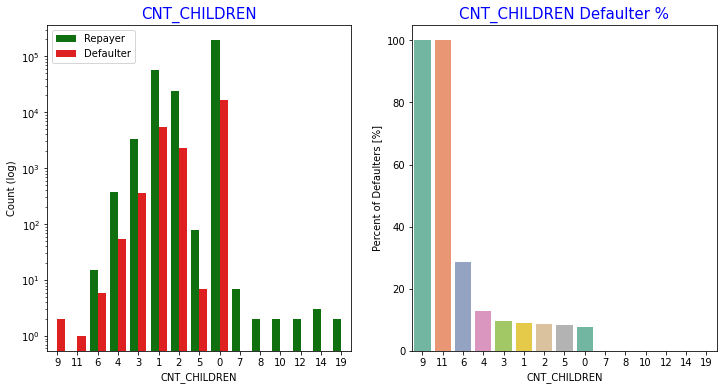

In [81]:
# analyze Number of children vs. Loan repayment status
univariate_categorical("CNT_CHILDREN",True)

<span style='font-family:Arial'>
    <ol>
        <li>Most of the clients do not have children</li>
        <li>Very few clients have more than 3 children</li>
        <li>Clients who have more than 3 children have a very high default rate, with child count 9 and 11 showing 100% default rate</li>
    </ol>
</span>  

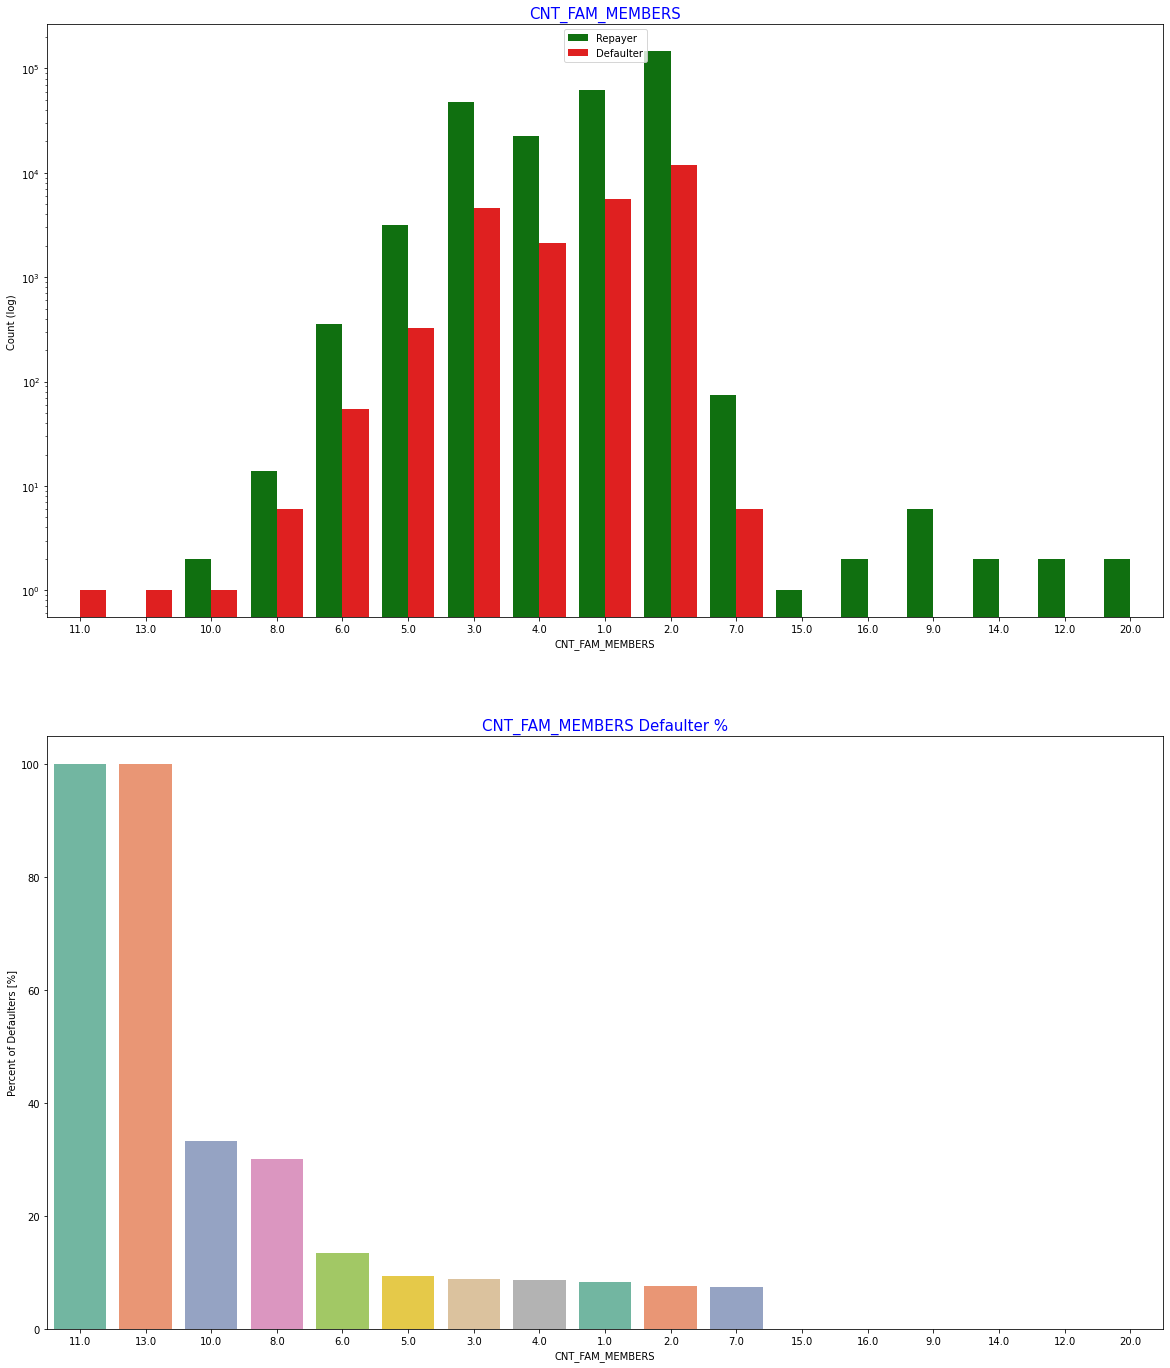

In [82]:
# analyze Number of family members vs. loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

<span style='font-family:Arial'>
    <br>Family member count follows the same trend as children count, where having more family members increases the risk of defaulting.
</span>   

<h4>   
      <font color = darkgreen >
            <span style='font-family:Arial'>
             5.3.2 Categorical Bi/Multivariate Analysis
            </span>   
        </font>    
</h4>

In [83]:
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


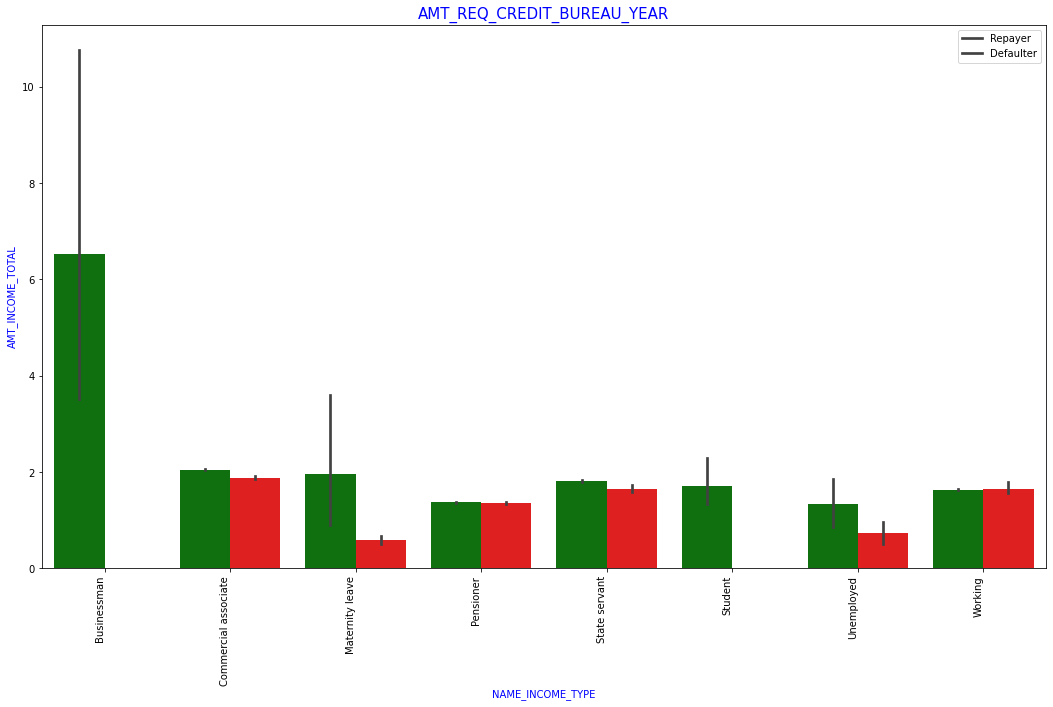

In [84]:
# Income type vs Income Amount
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",application_data,"TARGET",(18,10))

<span style='font-family:Arial'>
    <br>Businessman category has the highest income and the highest confidence level of not defaulting.
</span>    

<a id="numvar"></a>
<h3>   
      <font color = purple >
            <span style='font-family:Arial'>
             5.D. Numerical Variables Analysis
            </span>   
        </font>    
</h3>

In [85]:
# Bifurcating the application_data based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = application_data.loc[application_data['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = application_data.loc[application_data['TARGET']==1, cols_for_correlation] # Defaulters

In [86]:
# get the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


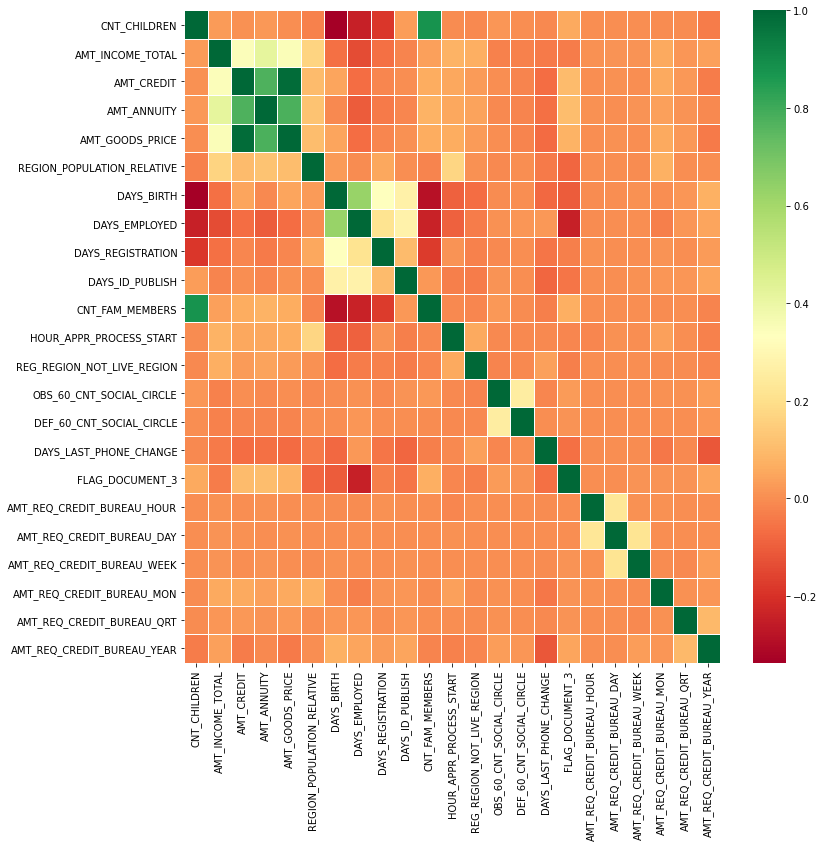

In [87]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<span style='font-family:Arial'>
    <br>Correlating factors amongst repayers:
    <br>Credit amount is highly correlated with
    <ul>
        <li> price of the goods for which the loan is given</li>
        <li> loan annuity</li>
        <li> total income</li>
    </ul>
</span> 

In [88]:
# get the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


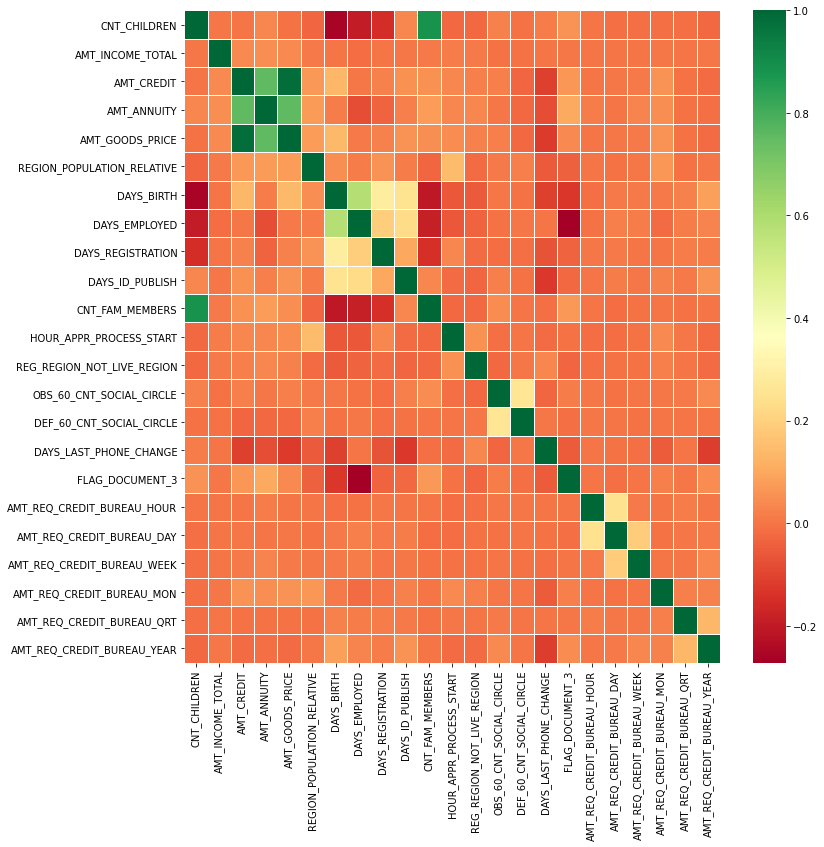

In [89]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<span style='font-family:Arial'> 
    <ul>
        <li> Credit amount is highly correlated with amount of goods price which is same as repayers. </li>
        <li> There is a severe drop in the correlation between total income and credit amount from  defaulters to repayers.</li>
</span> 

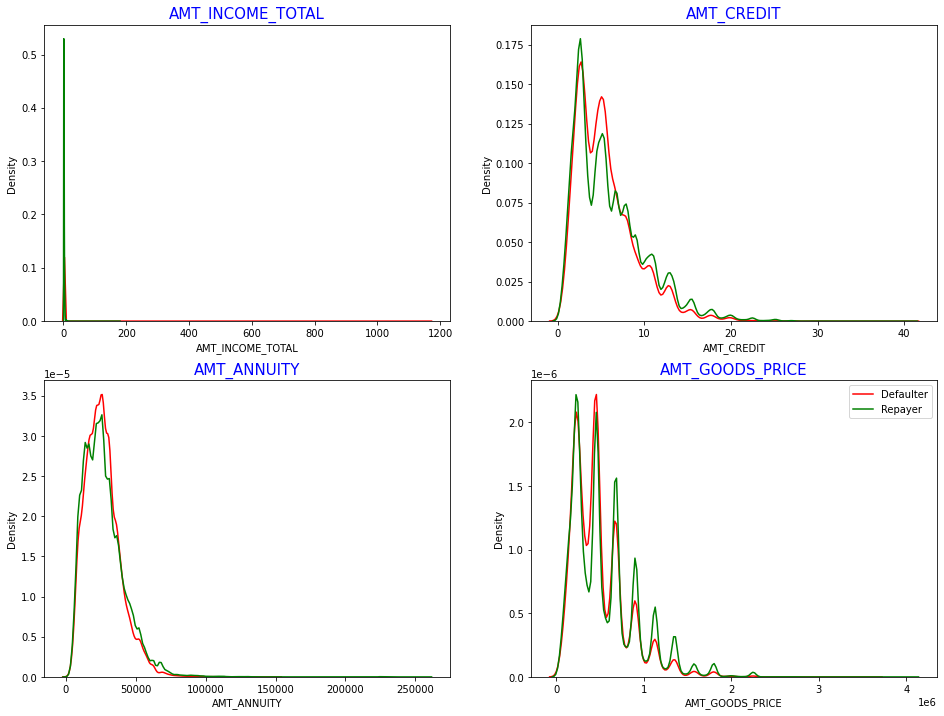

In [90]:
# plot the numerical columns related to AMT_X as distribution plot to see density
amount_X = application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount_X):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<span style='font-family:Arial'>
    <ul>
        <li> Credit amount on previous loans are mostly less than 1M </li>
        <li> Most annuity are below 50000</li>
        <li> Most of the loans are given for goods price below 1M </li>            
        <li> The repayers and defaulters distribution overlap in all the plots, so we cannot use any of these variables in isolation to make a decision</li>
    </ul>
</span>   

<Figure size 1080x432 with 0 Axes>

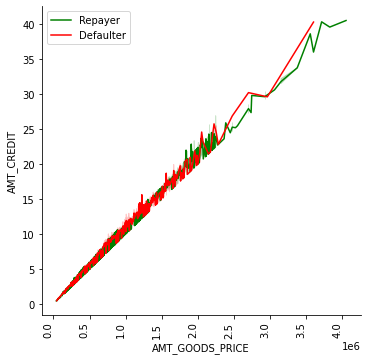

In [91]:
# check the relationship between Goods price and Credit against Loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',application_data,"TARGET", "line", ['g','r'], False,(15,6))

<span style='font-family:Arial'>
    <br>There appears more defaulters than repayers when the credit amount goes above 2.5M.
</span>   

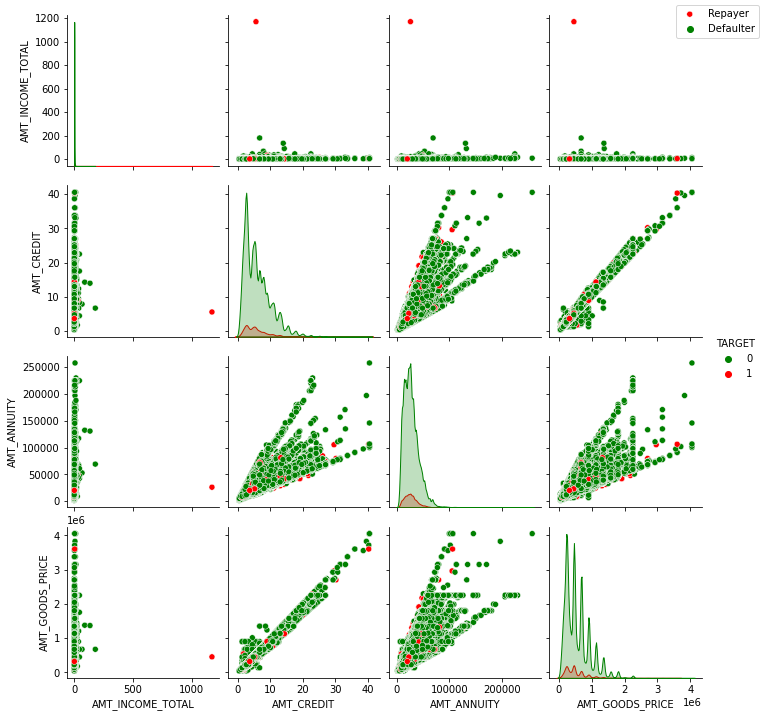

In [92]:
# pairplot between AMT_X against Loan repayment status
amount = application_data[['AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

<span style='font-family:Arial'>
    <ul>
        <li> When AMT_ANNUITY >150k and AMT_GOODS_PRICE > 3M, there is a very small chance of defaulting</li>
        <li> AMT_CREDIT and AMT_GOODS_PRICE are highly correlated - most of the data are consolidated in the form of a line in the scatterplot</li>
        <li> There are very small defaulters for AMT_CREDIT >2.5M</li>
    </ul>
</span>    

<a id="merge"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            6. Merged Dataframes Analysis
            </span>   
        </font>    
</h2>

In [93]:
# merge both dataframes on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(application_data, prev_application, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,25,20-30,1,0-5,200k-300k,400k-500k,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,45,40-50,3,0-5,200k-300k,1M Above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,50 above,0,Unknown,0-100K,100K-200K,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,Y,1,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobi

In [94]:
# check the shape of the merged dataframe
loan_process_df.shape

(1413701, 77)

In [95]:
# check the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 77 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [96]:
# check merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.411880e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,5.114275e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,2.006552e+05,9.964321e-01,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,1.911188e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.820189e+05,5.962560e-02,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,3.890839e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,6.637500e+04,1.000000e+00,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,5.627679e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,1.123200e+05,1.000000e+00,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,6.606783e-0

In [97]:
# bifurcate application_data based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters

<p>
    <span style='font-family:Arial'>
        <b> Plot Purpose of the loan by Contract status: </b>
    </span>
</p>

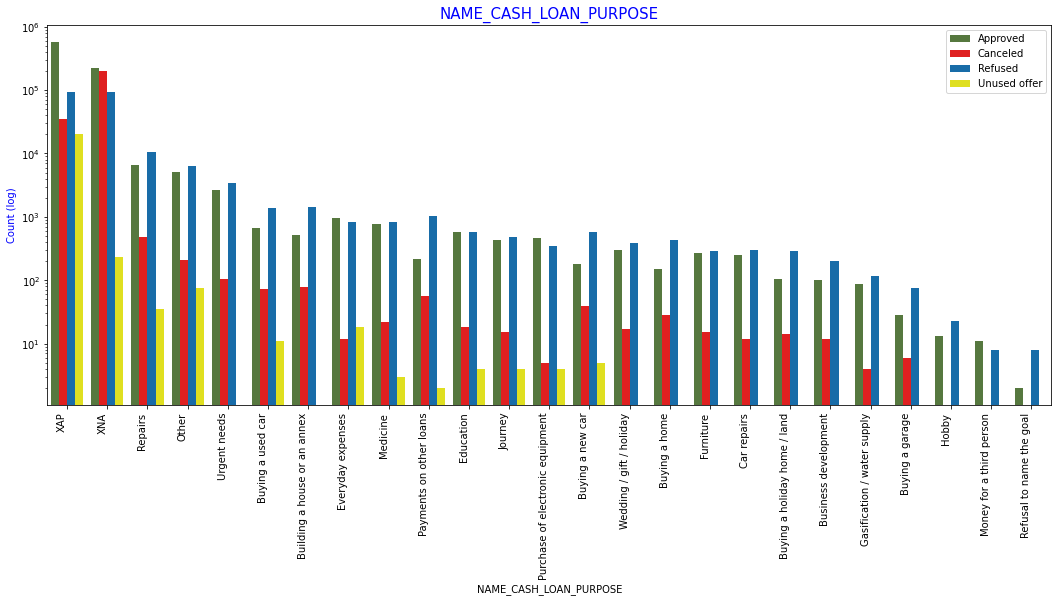

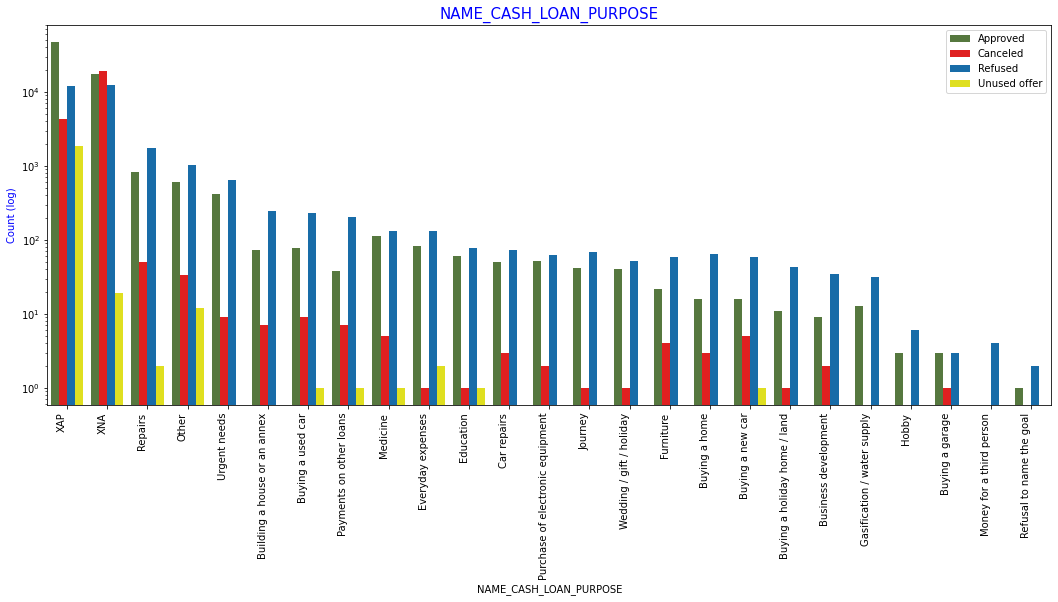

In [98]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

<span style='font-family:Arial'>
    <ul>
        <li> Loan purpose has a very high number of unknown values (XAP, XNA)</li>
        <li> Loans taken for the purpose of Repairs have the highest default rate</li>
        <li> A high number of applications for the purpose of Repairs and Other have been rejected by the bank or refused by the clients. This shows that loan purpose Repair and Other are regarded as high risk by the bank that either the bank rejected or the bank offered very high loan interest rates  which were not feasible for the clients, thus they refused the loans.</li>
    </ul>
</span>   

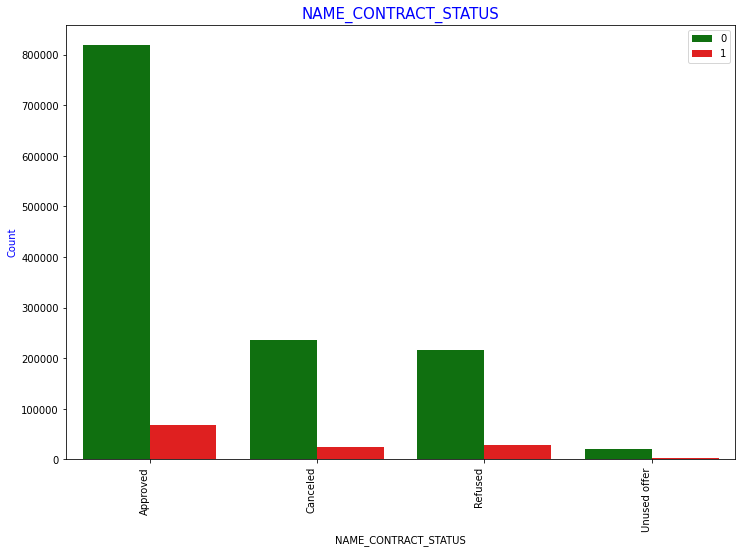

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [99]:
# check the Contract Status vs. Loan repayment status
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" 
print (df1)

<span style='font-family:Arial'>
    <ul>
        <li> ~90% of the clients who previously cancelled have actually been repaying the current loans. Revisiting the interest rates for clients with Canceled contract status would be beneficial.</li>
        <li> 88% of the clients who were previously refused a loan have been repaying the current loans. The bank should further analyze Refused applications as these category seem to have high probability of repaying the loans. </li>
    </ul>
</span>   

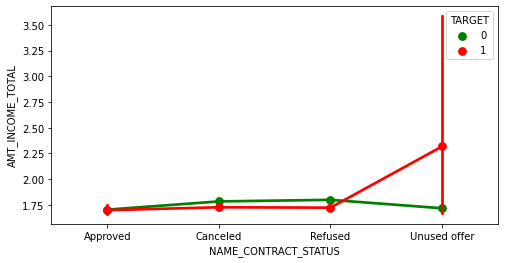

In [100]:
# plot Contract status vs. Income
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

<span style='font-family:Arial'>
    <br>The point plot shows that the people with previously unused offers and defaulted have average income higher than the others.
</span> 

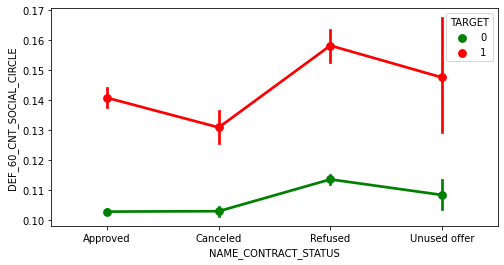

In [101]:
# plot the relationship between people who defaulted in the last 60 days being in client's social circle and Contract status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

<span style='font-family:Arial'>
    <br>Clients who have an average of 0.13 or higher DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and hence, client's social circle has to be analysed before providing the loan.
    </span> 

<a id="conclusion"></a>
<h2>   
      <font color = blue >
            <span style='font-family:Arial'>
            7. Conclusions
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Arial'>
        After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:
    </span>
</p>

<span style='font-family:Arial'>
    <b>The safest categories to offer loans: </b>
    <ol>
        <li>NAME_EDUCATION_TYPE: People with Academic degree. </li>
        <li>NAME_INCOME_TYPE: Students and Businessmen.</li>
        <li>REGION_RATING_CLIENT: RATING 1.</li>
        <li>ORGANIZATION_TYPE: People with Trade Type 4 and Industry type 12</li>
        <li>DAYS_BIRTH: People above age of 50.</li>
        <li>DAYS_EMPLOYED: People with 40+ year employment.</li>
        <li>AMT_INCOME_TOTAL:People with Income 700k-800k</li>
        <li>NAME_CASH_LOAN_PURPOSE: Loans purpose for Hobby, Buying a garage.</li>
        <li>CNT_CHILDREN: People with 3 or less children.</li>
    </ol>
</span>    

<span style='font-family:Arial'>
    <b>The riskier categories to offer loans: </b>
    <ol>
        <li>CODE_GENDER: Men</li>
        <li>NAME_FAMILY_STATUS : Civil marriage or Single</li>
        <li>NAME_EDUCATION_TYPE: Lower Secondary or Secondary</li>
        <li>NAME_INCOME_TYPE: Maternity leave or Unemployed</li>
        <li>REGION_RATING_CLIENT: Rating 3</li>
        <li>OCCUPATION_TYPE: Low-skill Laborers (riskiest), Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff</li>
        <li>ORGANIZATION_TYPE: Transport: type 3 (riskiest), Industry: type 13, Industry: type 8</li>
        <li>DAYS_BIRTH: age group of 20-40</li>
        <li>DAYS_EMPLOYED: less than 5 years</li>
        <li>CNT_CHILDREN & CNT_FAM_MEMBERS: more than 9 children</li>
        <li>AMT_GOODS_PRICE: above 3M</li>
    </ol>
</span>    

<span style='font-family:Arial'>
    <p>The following categories tend to default; however, due to the number of applicants or the amount of the loan, the bank could provide loans with higher interest rate to mitigate the risk, thus preventing business loss:  </p>
    <ol>
        <li>NAME_HOUSING_TYPE: Rented apartments and Living with parents</li>
        <li>AMT_CREDIT: 300-600k</li>
        <li>AMT_INCOME: Income less than 300,000</li>
        <li>CNT_CHILDREN & CNT_FAM_MEMBERS: People with 4 to 8 children</li>
        <li>NAME_CASH_LOAN_PURPOSE: Repairs or Other</li>
    </ol>
</span>    

<span style='font-family:Arial'>
    <b>Other suggestions: </b>
    <ul>
        <li>90% of the previously cancelled clients have been repaying the loan. Records of the reason for cancellation might help the bank to determine and negotiate terms. </li>
        <li>88% of the clients who were refused by the bank previously have now turned into repaying clients. Records of the reason for cancellations might help the bank to determine whether these customers should be invited to apply for loan.</li>
    </ul>
</span>  